In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression,Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from math import sqrt
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor

In [5]:
df = pd.read_csv('C:\\Users\\abhim\\OneDrive\\Desktop\\project\\projects\\diamonds\\diamonds.csv')
df2 = df.copy()

### pseudo code
- eda
- univariate-bivariate
- hypothesis testing
- make new features if possible 
- check significance of those features 
- select features rfe sfe 
- calculate vif 
- 
- fir linear, lasso, ridge , elastic net
- interpretation of performance metrics for all of teh above 3 models
- xgboost regression
- make a streamlit web app to predict price 
- 


### Problem statement
- Find the price of the diamond
- we have 7 features 

**A diamond has 4 c's carat cut clarity color**

**A) carat**
- Measurement used to determines the weight of a diamond, . One carat is equal to 200 milligrams or 0.2 grams

**B) color** 
- A diamond is differentiated on basis of appearance
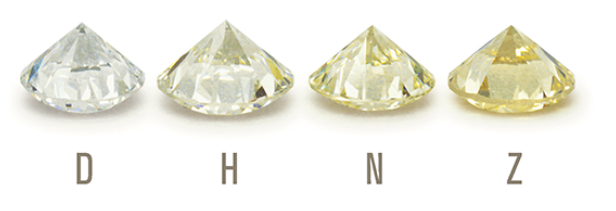
- color grading of diamonds ranges from D (colorless) to Z (light yellow or brown). The closer a diamond is to being colorless, the rarer and more valuable it tends to be.

**C) clarity**
- Diamond clarity is a measure of the purity and rarity of the stone, graded by the visibility of these characteristics under 10-power magnification
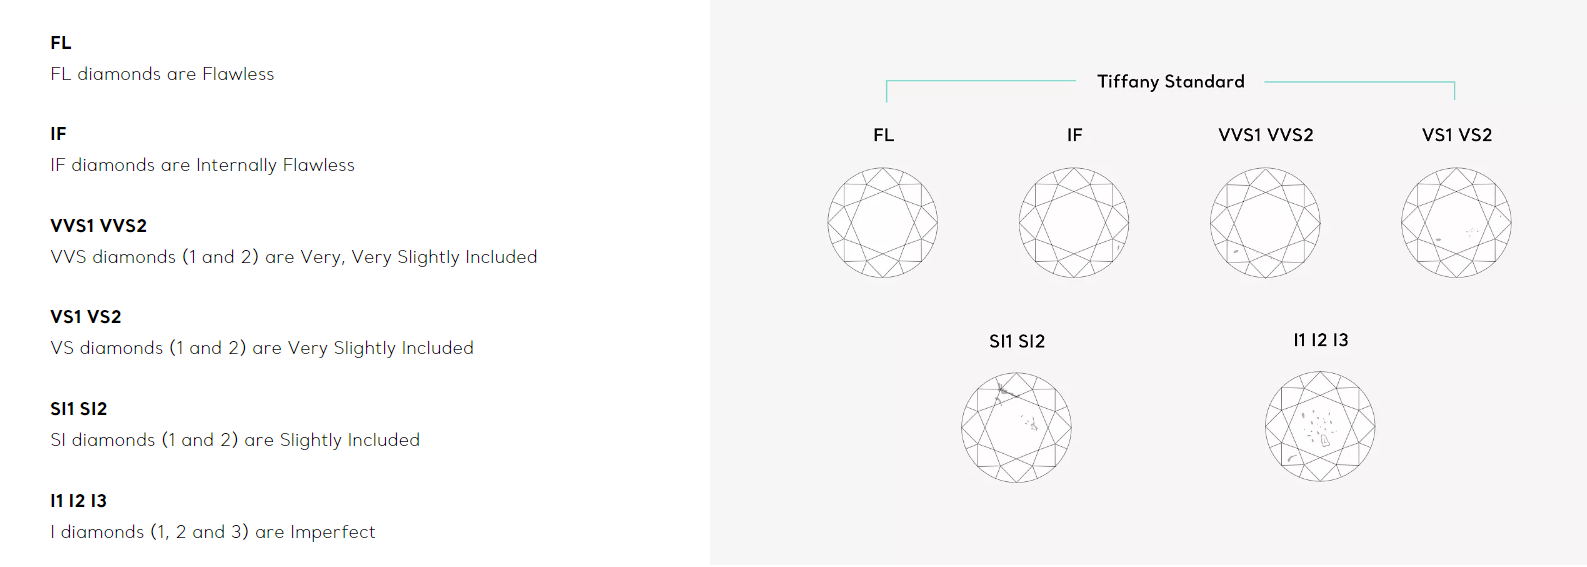
***Very, Very Slightly Included(VVS)***
- indicating that the diamond has extremely small and minor inclusions that are challenging to detect even under 10x magnification.

**D) cut**
- rather the way in which the diamond's facets interact with light. A well-cut diamond is crafted to maximize its brilliance, sparkle, and overall visual appeal.
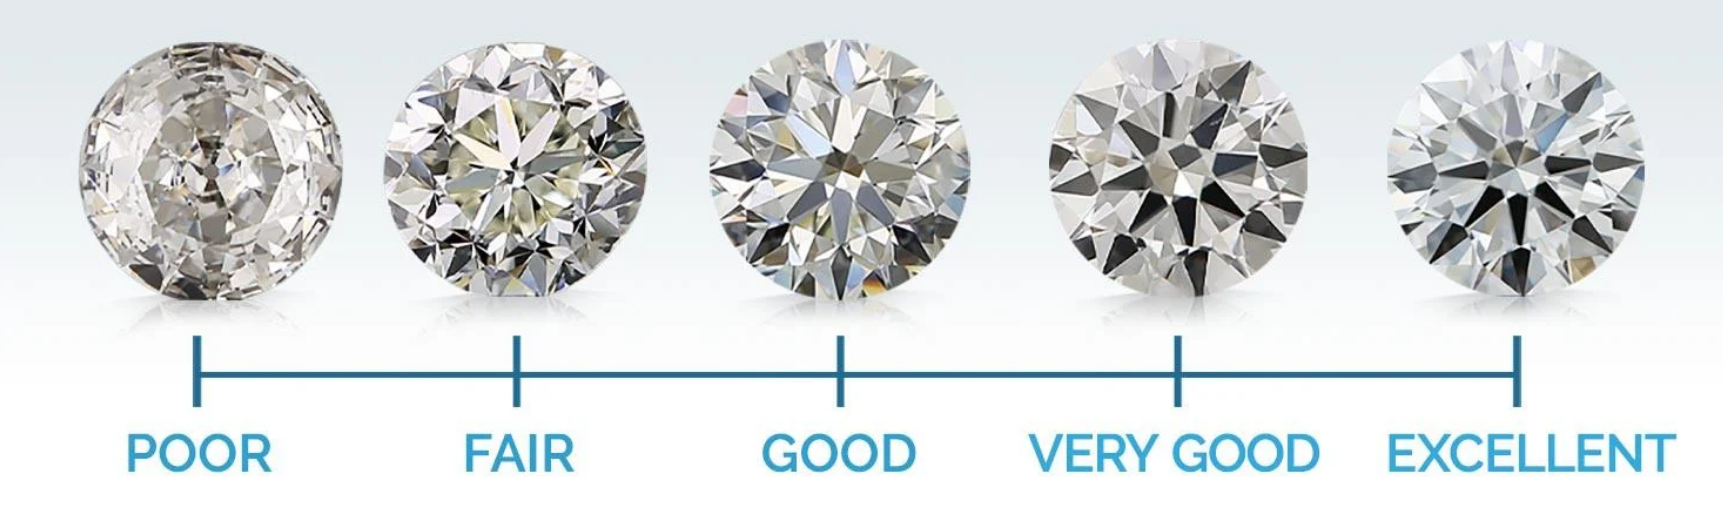

**E) Dimesnions** 
- x,y,z
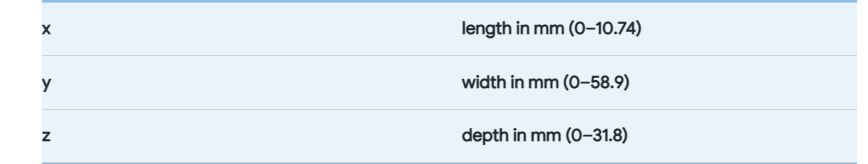

**F) Depth**
- The depth of a diamond refers to the measurement of its height or the distance between the table (top flat surface) and the culet (bottom point). It is usually expressed as a percentage of the average diameter of the diamond.

**G) Table**
- Width of the diamond head 

In [82]:
df.head()

Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75

In [83]:
df = df.drop(columns = 'Unnamed: 0')

### DESCRIPTIVE STATS

**A) Univariate analysis**
- Check all the numerical columns and find the descriptive stats
- check all the categorical features and count different categories
- check for spread of data
- check if features are skewd
- 


**B) find the different categories in our categorical features ***

- color

In [84]:
df.color.unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

- clarity

In [85]:
df.clarity.unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

**C) Check missing values**

In [86]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [87]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

**D) check for numerical features descriptive stats**

In [88]:
df.describe()

carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53940.000000  53940.000000  
mean       5.734526      3.538734  
std        1.142135      0.705699  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  
max       58.900000     31.800000

### price

   **A) Average price is 3932**
   
   **B) MAx price of diamond is 18823 $
   
   **C) 50% percent of diamond are priced at 2401 $**
   
   **D) 25% of diamond are priced in between 2401 to 5324**
   
### Carat

  **1) Minimum carat is 0.2 max is 5.01**
  
  **2) 75% percent of diamond are of 1 carat**
  
  **3) Carat may have outliers or skewed because of difference between 75 percentile and max value**
  
### Depth

  **1) Average depth percentage of diamond is 61**
  
  **2) Min depth of diamond is 43 and max depth is 79**
  
### table

  **1) Average table of diamond is 61 and max is of 79 mm**
  
  **2) 75% of diamond has table width of 59 and 50 percent is of 57**
  
### Dimensions x,y,z

  **1)Average size of diamond is 5x5x3**
  

### E) Categorical features

In [89]:
## MAke a df for countplot of all categorical variables

In [90]:
def countplot(df):
    for column in df.columns:
        sns.countplot(data =df, x = column)
        plt.title(f'Countplot of {column}')
        plt.show()

- Select cat and numerical columns

In [91]:
df_cat = df.select_dtypes(include='object')
df_num = df.select_dtypes(exclude = 'object')

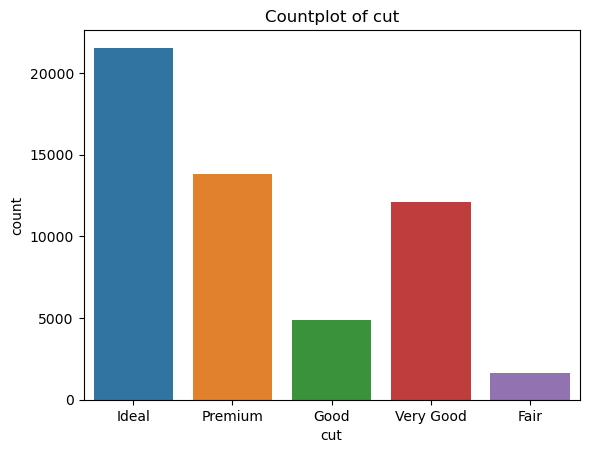

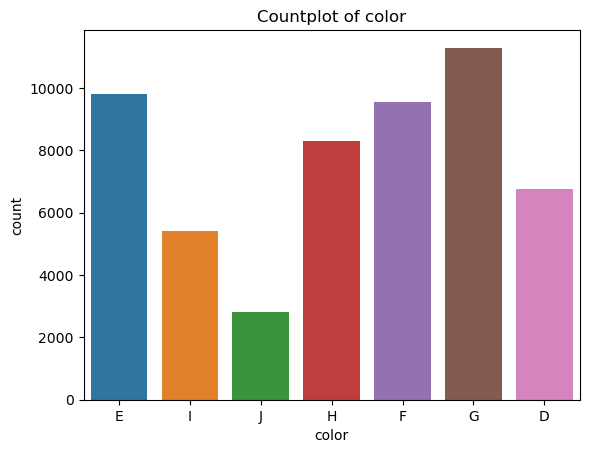

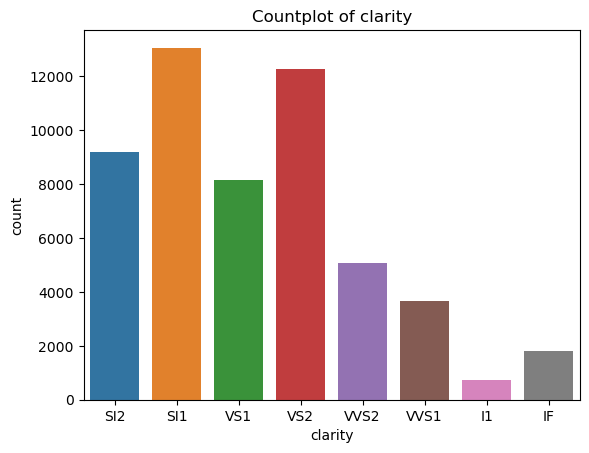

In [20]:
countplot(df_cat)

### Categorical features
- There is no poor cut diamonds , all diamonds start from fair cut and ideal cut diamonds are of high proportion
- proportion of G and E color is higher comparatively 
- count of Diamonds having clarity of sl1 and vs2 is higher

### F) Numerical columns

In [21]:
def Summarise_numerical(df):
    for column in df.columns:
        print('Five point summary of',column,'is',df[column].describe())
    

In [22]:
Summarise_numerical(df_num)

Five point summary of carat is count    53940.000000
mean         0.797940
std          0.474011
min          0.200000
25%          0.400000
50%          0.700000
75%          1.040000
max          5.010000
Name: carat, dtype: float64
Five point summary of depth is count    53940.000000
mean        61.749405
std          1.432621
min         43.000000
25%         61.000000
50%         61.800000
75%         62.500000
max         79.000000
Name: depth, dtype: float64
Five point summary of table is count    53940.000000
mean        57.457184
std          2.234491
min         43.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         95.000000
Name: table, dtype: float64
Five point summary of price is count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64
Five point summary of x is count    53940.000000
mean       

In [23]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

### G) Bivariate Analysis 

- Average carat acoording to 

 ***cut***
 
 ***clarity***
 
 ***color***

 ***price***
 
 ***table***
 
- Average depth according to 

 ***cut***
 
 ***clarity***
 
 ***color***

 ***price***
 
 ***table***
 
- Average price according to

 ***cut***
 
 ***clarity***
 
 ***color***

 ***price***
 
 ***table***
 
- Average volume according to

 ***cut***
 
 ***clarity***
 
 ***color***

 ***price***
 
 ***table***

- Average carat according to

cut, clarity, color, price, table

In [13]:
### boxplot of all bivariate w.r.t every numerical column
df_cat = df.select_dtypes(include = 'object')
df_num = df.select_dtypes(exclude = 'object')

In [18]:
num_cols = []
for col in df_cat.columns:
    num_cols.append(col)

In [37]:
num_cols

['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

ValueError: num must be 1 <= num <= 40, not 43

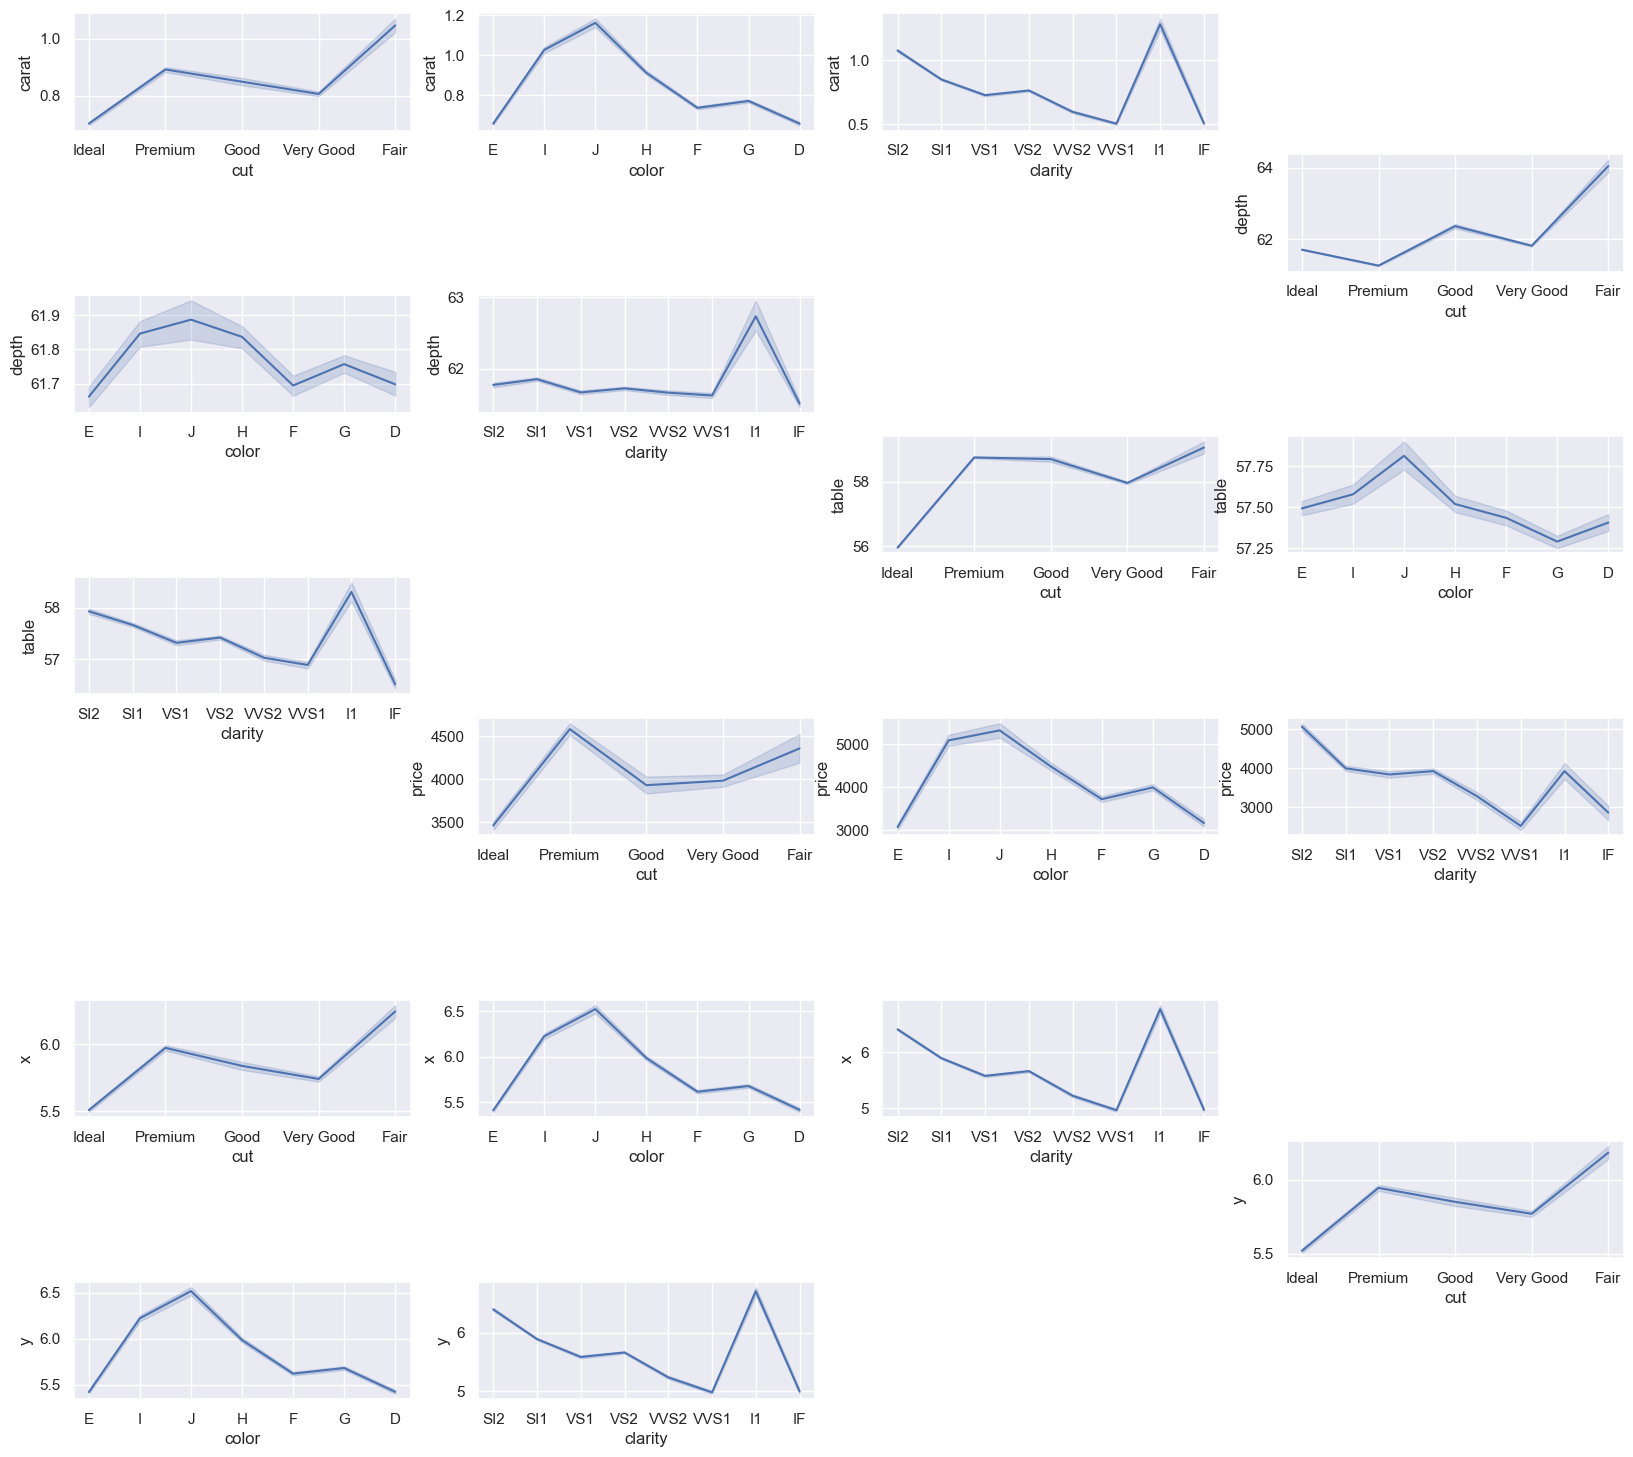

In [41]:
### bivariate line plot
for i,num in enumerate(df_num.columns):
    for j,col in enumerate(df_cat.columns):
        plt.subplot(10, 4, i * len(num_cols) + j + 1)#gridspec_kw={'aspect': 1.5, 'hspace': 0.5, 'wspace': 0.5})
        sns.lineplot(data = df, x = col, y = num)
plt.tight_layout(w_pad = 0.2)  # Adjust the spacing between subplots
plt.show()

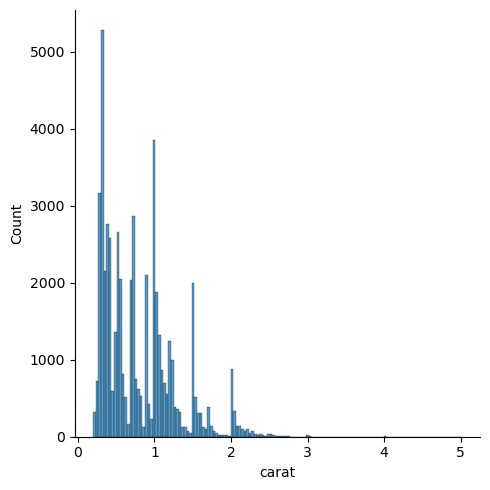

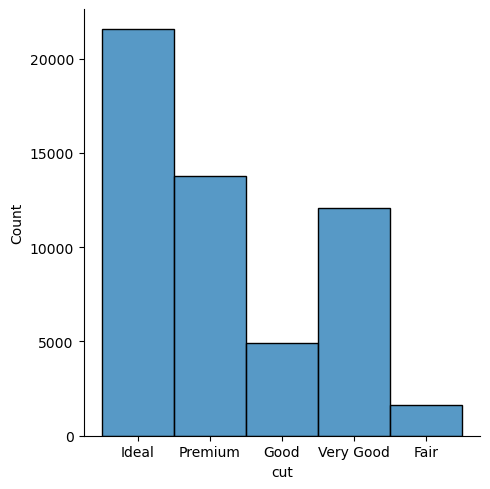

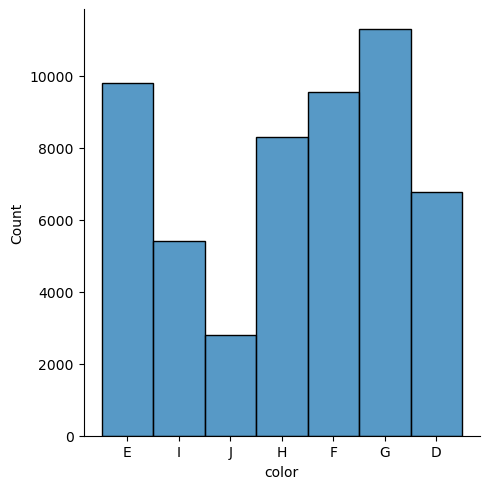

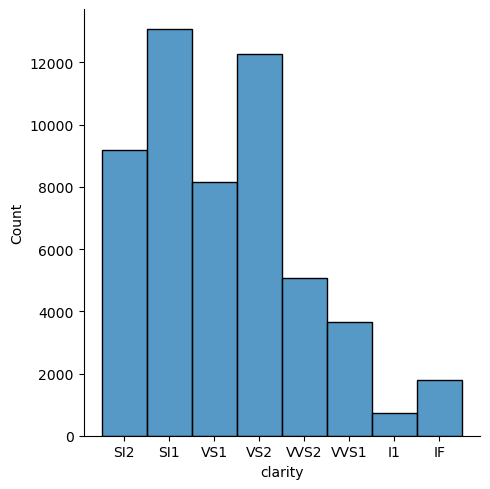

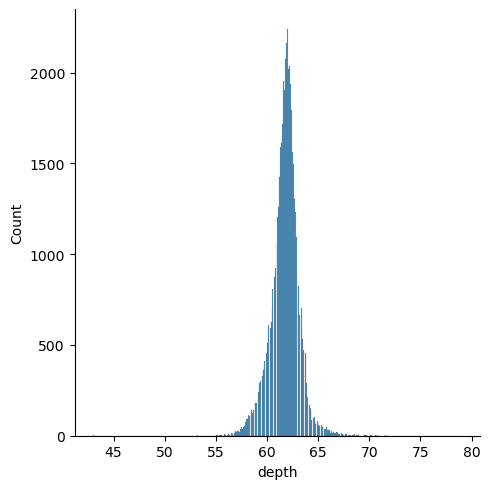

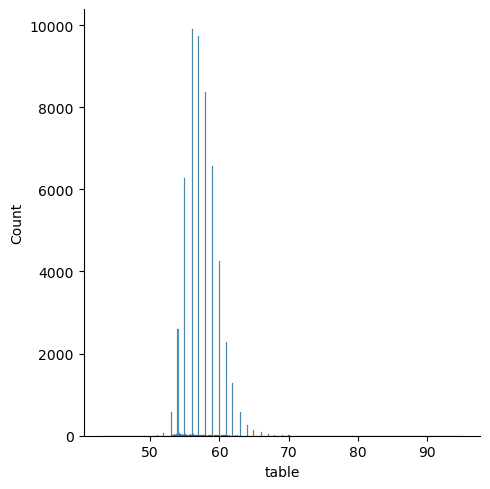

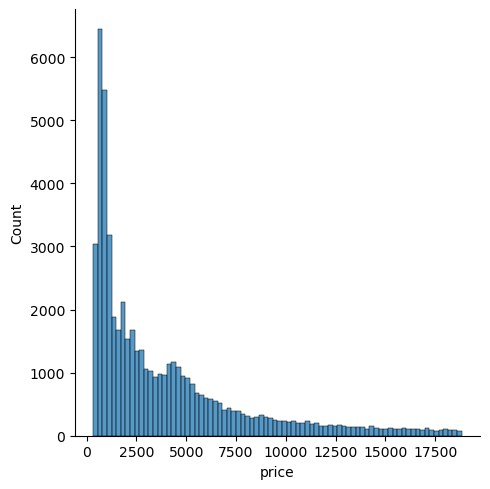

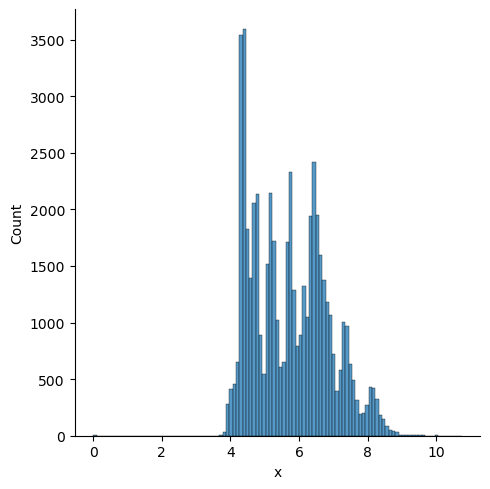

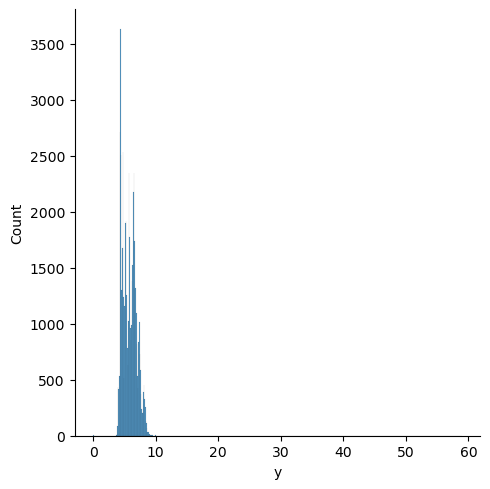

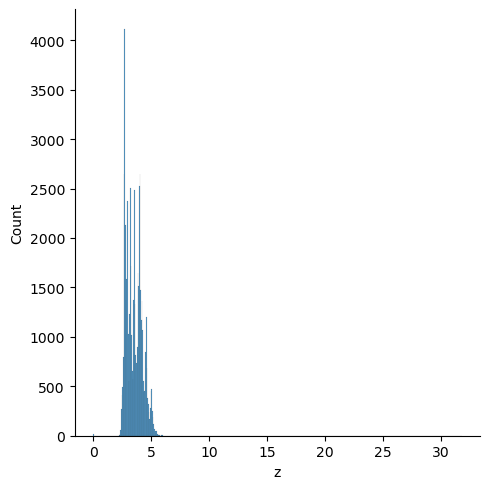

In [26]:
for col in df.columns:
    sns.displot(df[col])
    plt.show()

 **Observation**
- Features and label are not normally distributed , 
- Fit the model, check performance ,transform the label using log transformation and check the performance 

### Bivariate

In [27]:
### bivariate for boxplot

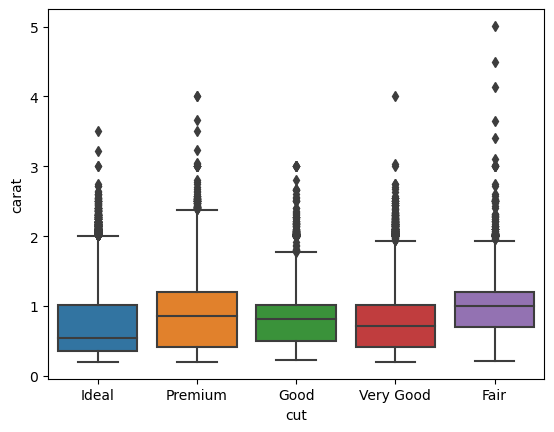

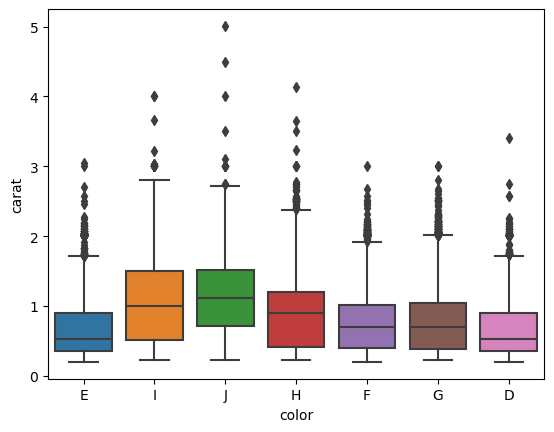

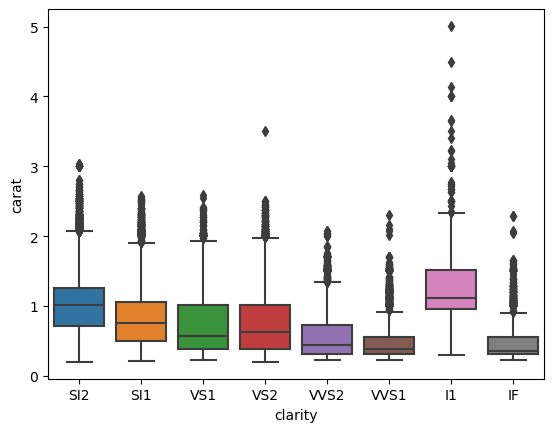

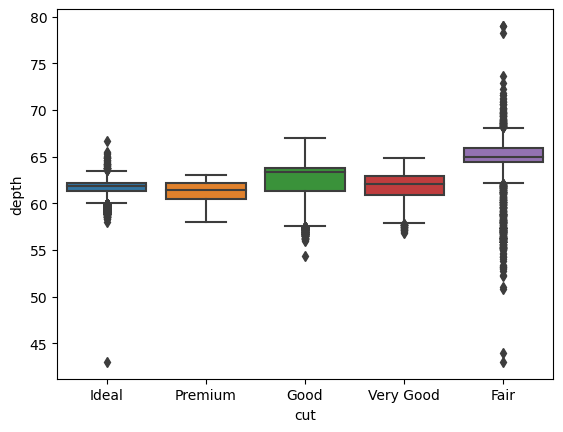

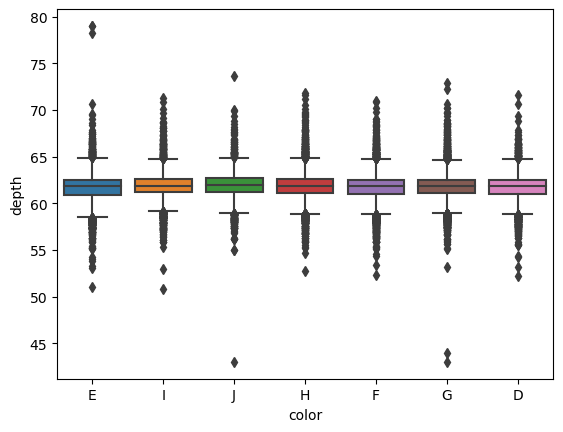

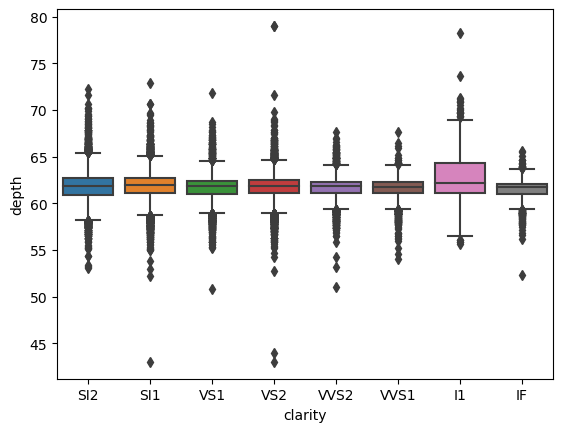

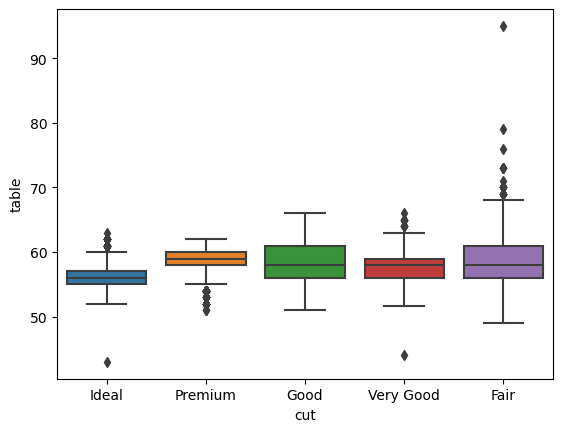

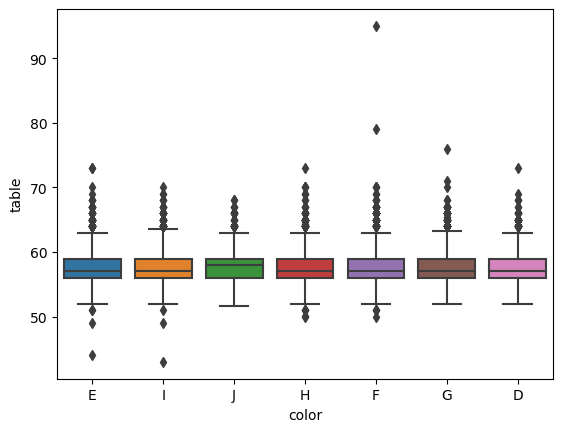

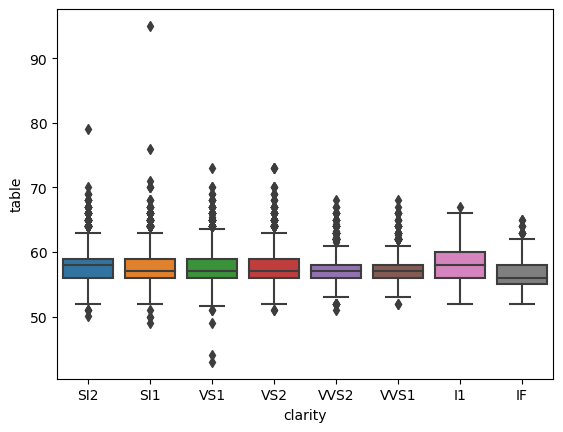

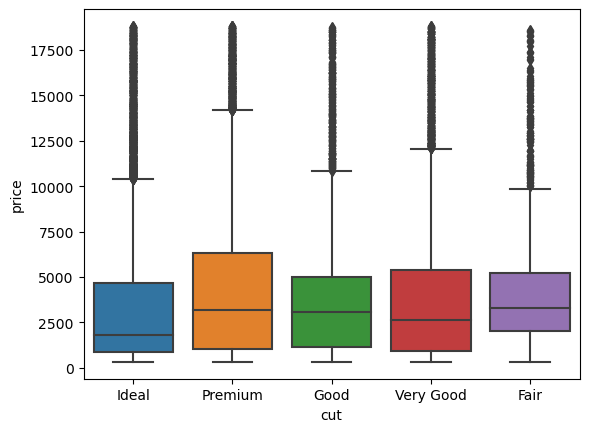

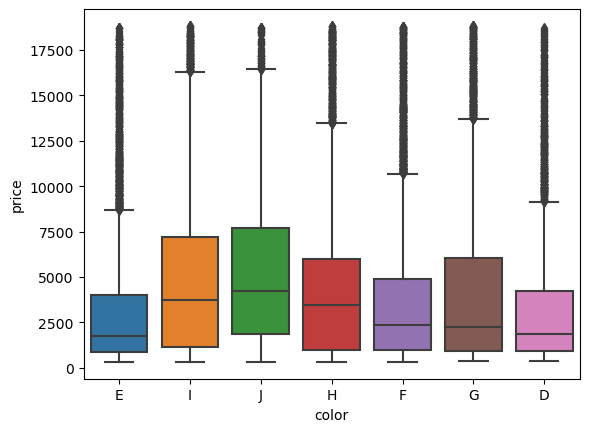

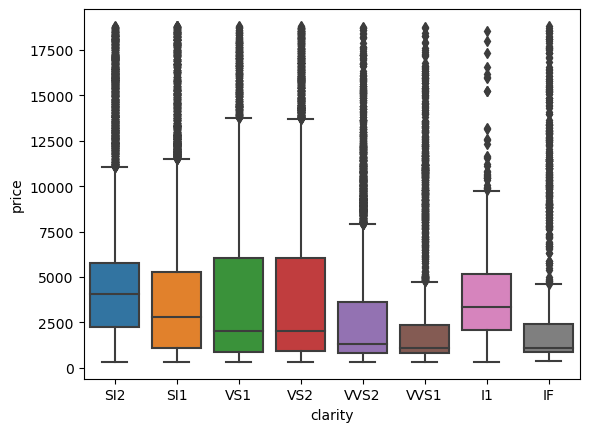

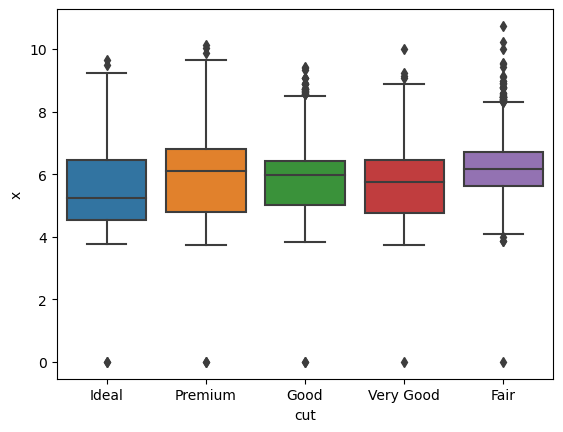

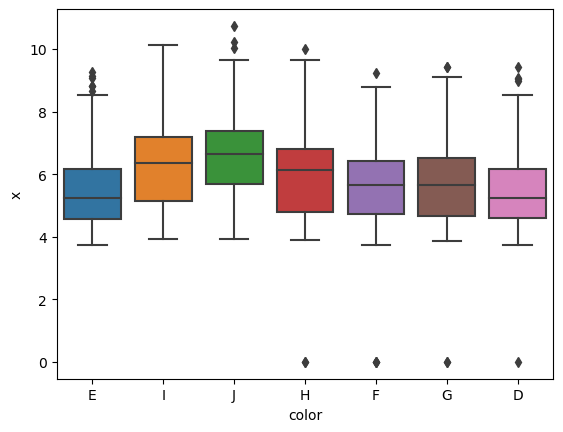

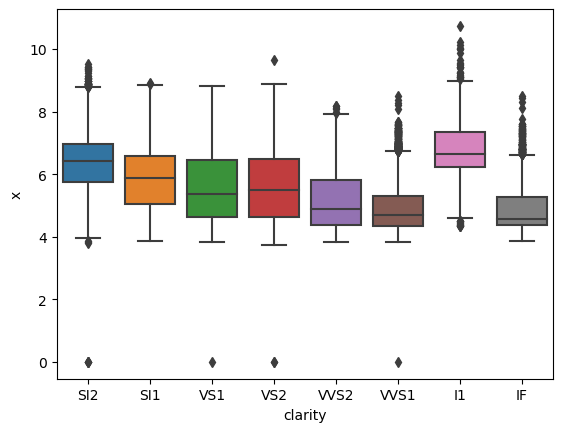

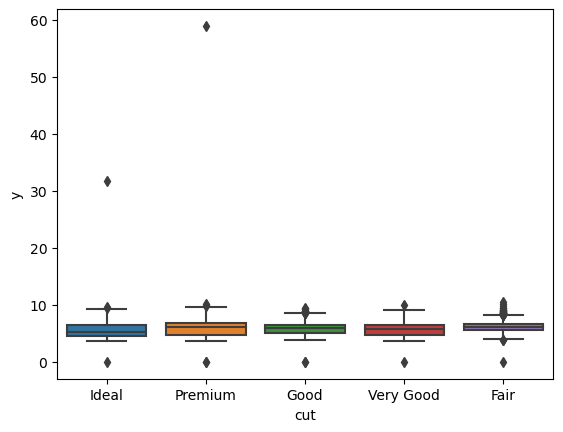

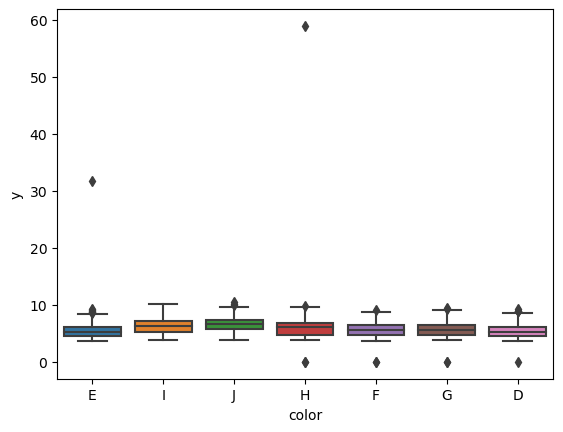

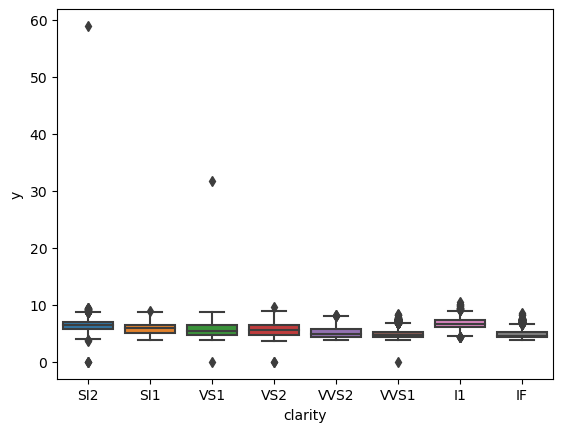

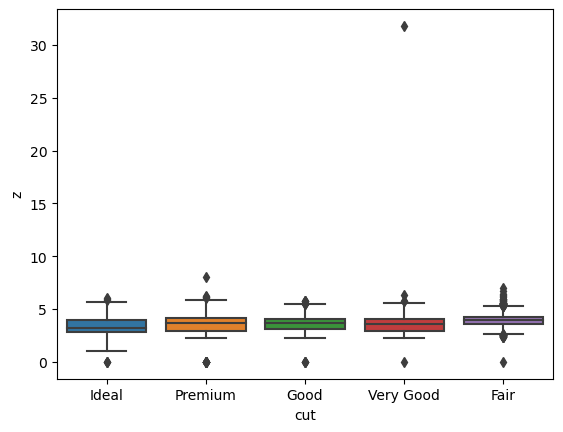

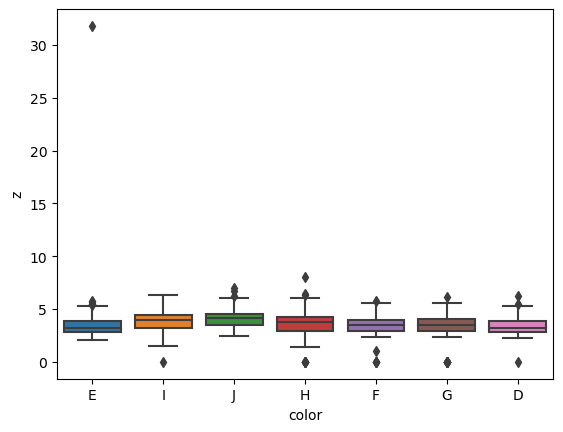

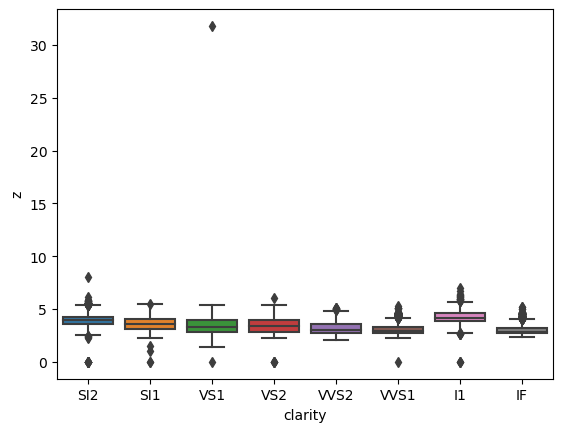

In [28]:
for num in df_num.columns:
    for col in df_cat.columns:
        sns.boxplot(data = df, x = col, y = num)
        plt.show()

- numerical and numerical columns

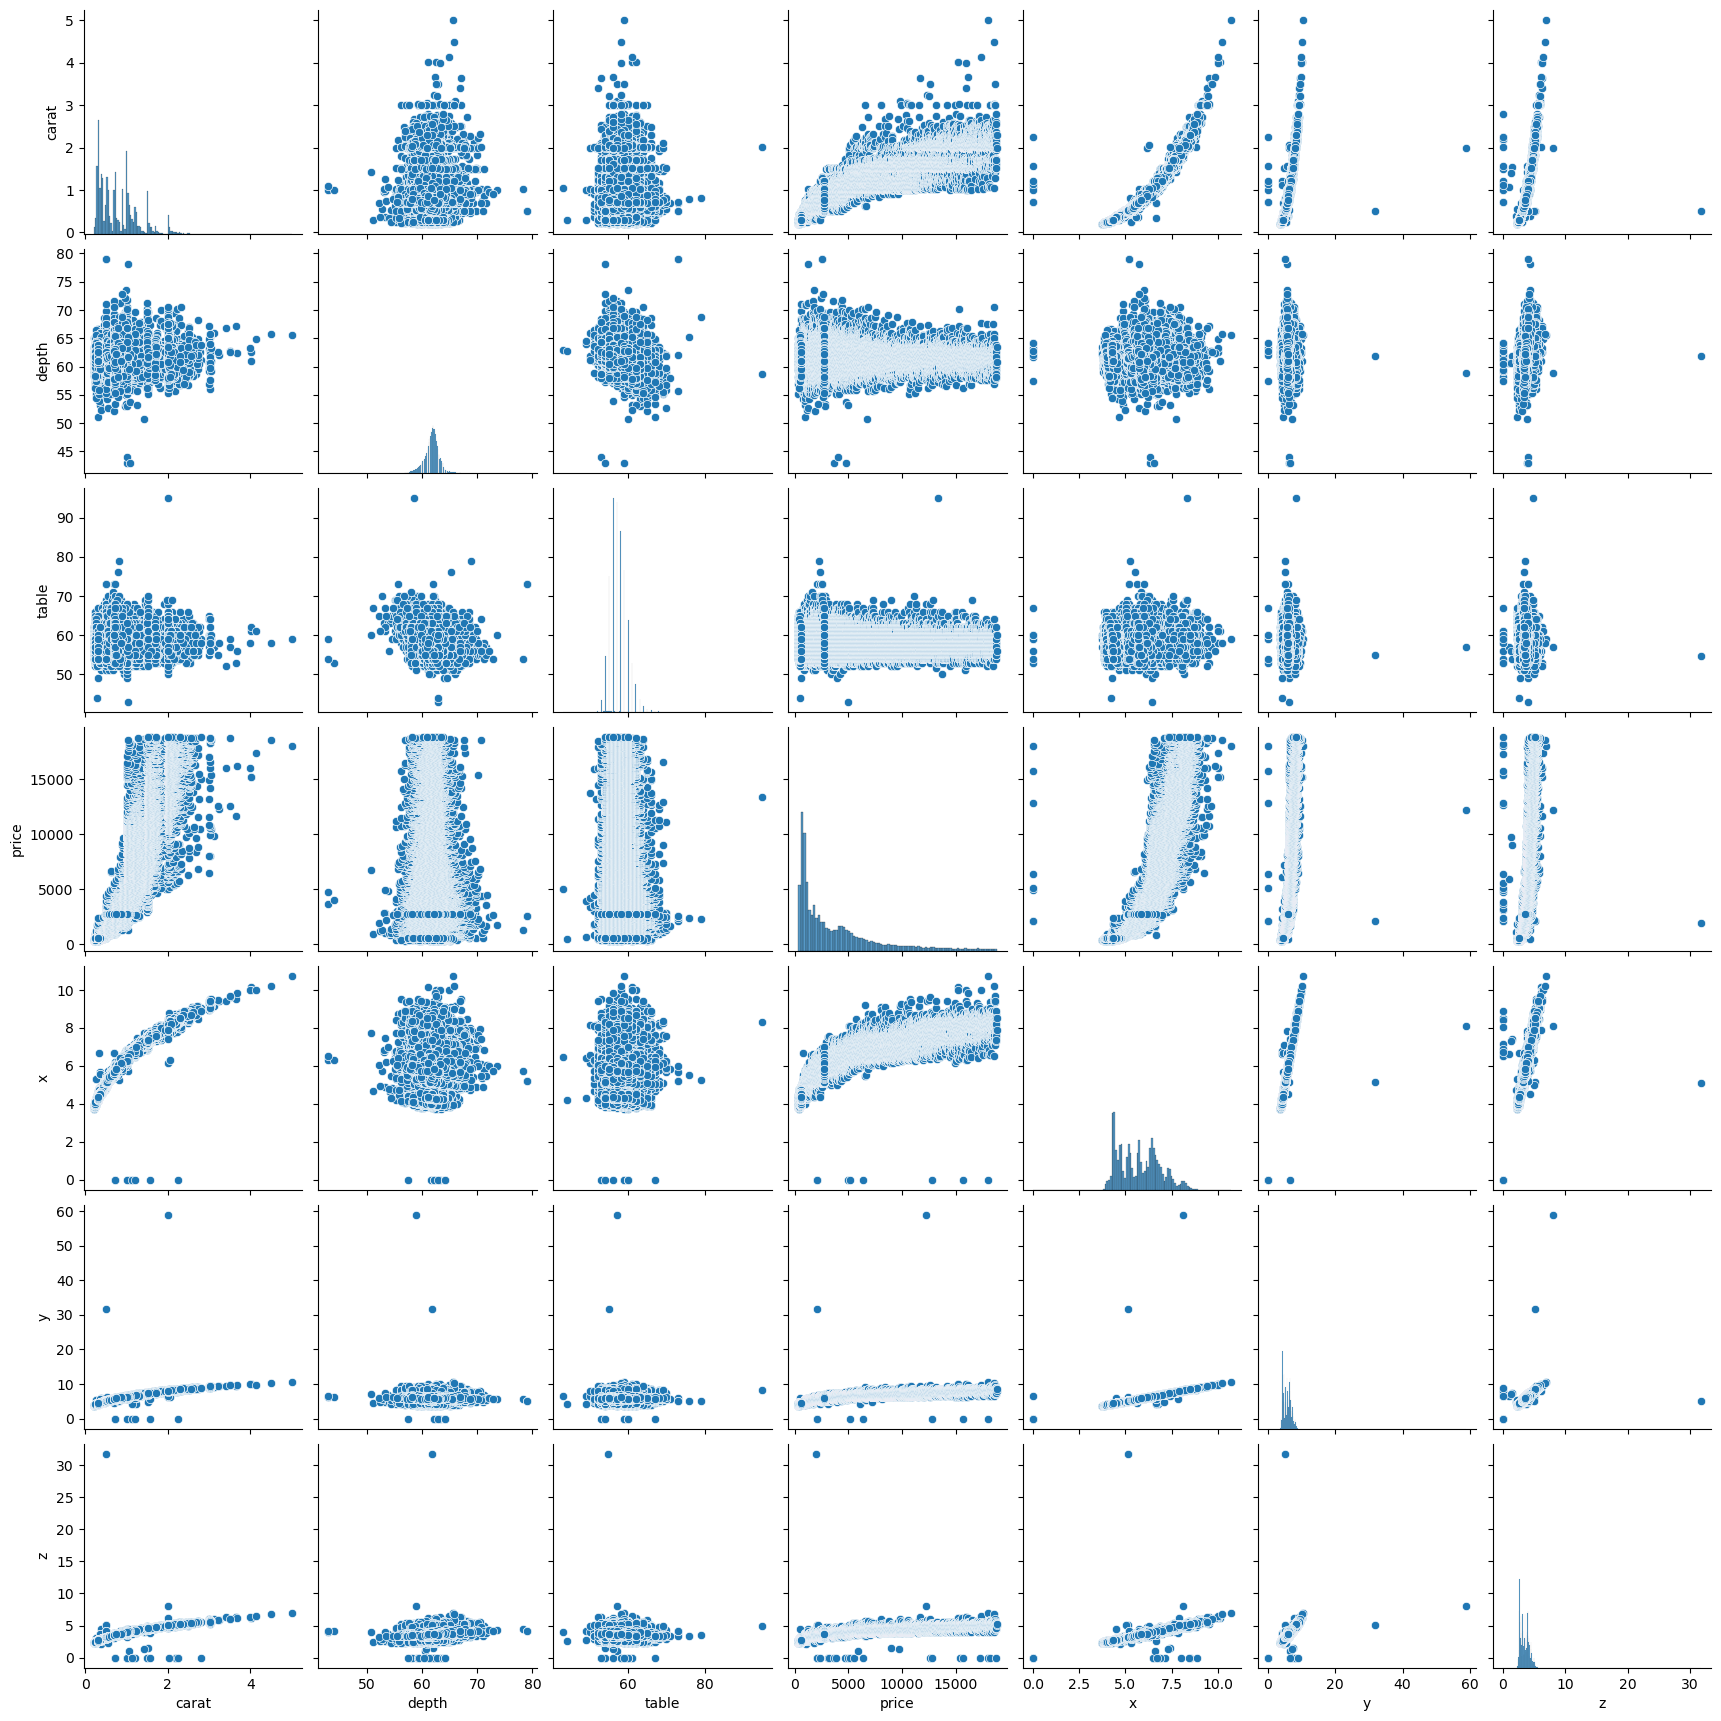

In [29]:
sns.pairplot(df_num)

- numerical and categorical

In [30]:
for col1 in df_cat.columns:
    for col2 in df_cat.columns:
        cross_tab = pd.crosstab(df[col1],df[col2])
        print('Between', cross_tab)

Between cut        Fair  Good  Ideal  Premium  Very Good
cut                                             
Fair       1610     0      0        0          0
Good          0  4906      0        0          0
Ideal         0     0  21551        0          0
Premium       0     0      0    13791          0
Very Good     0     0      0        0      12082
Between color         D     E     F     G     H     I    J
cut                                               
Fair        163   224   312   314   303   175  119
Good        662   933   909   871   702   522  307
Ideal      2834  3903  3826  4884  3115  2093  896
Premium    1603  2337  2331  2924  2360  1428  808
Very Good  1513  2400  2164  2299  1824  1204  678
Between clarity     I1    IF   SI1   SI2   VS1   VS2  VVS1  VVS2
cut                                                     
Fair       210     9   408   466   170   261    17    69
Good        96    71  1560  1081   648   978   186   286
Ideal      146  1212  4282  2598  3589  5071  20

In [31]:
mean_values = df.groupby(by = 'cut')['x'].mean().reset_index()

In [32]:
mean_values

cut         x
0       Fair  6.246894
1       Good  5.838785
2      Ideal  5.507451
3    Premium  5.973887
4  Very Good  5.740696

###

Text(0.5, 1.0, 'Cut vs average value of x')

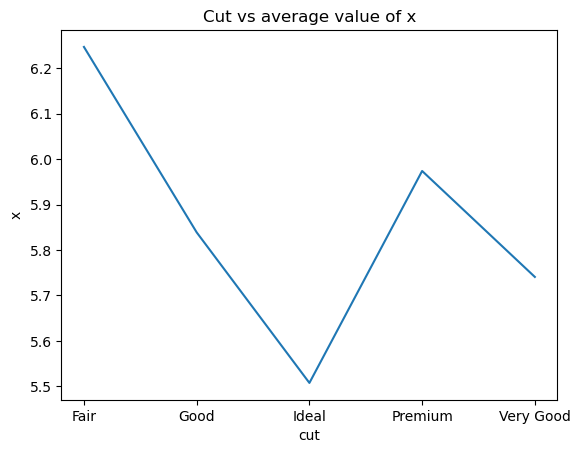

In [33]:
sns.lineplot(data = mean_values , x = 'cut',y='x')
plt.xlabel('cut')
plt.ylabel('x')
plt.title('Cut vs average value of x')

In [29]:
df_num = df.select_dtypes(exclude = 'object')
df_num.columns

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z'], dtype='object')

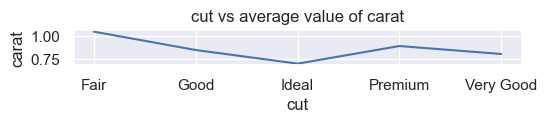

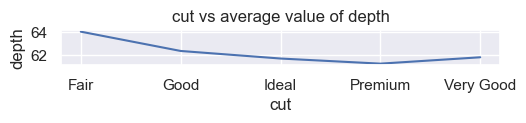

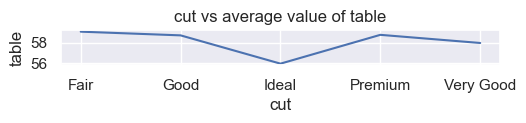

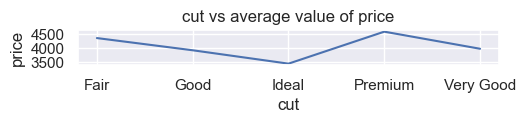

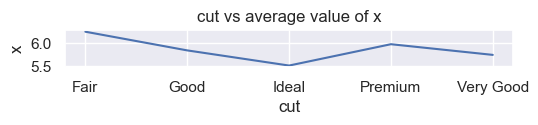

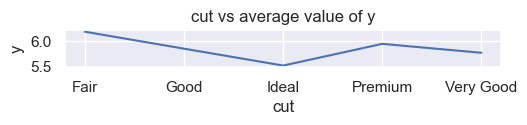

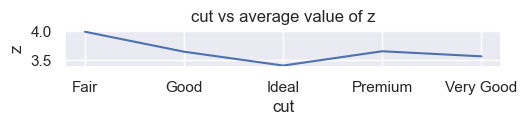

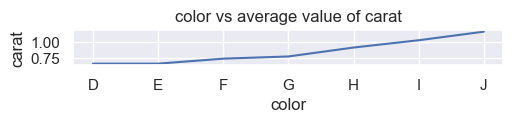

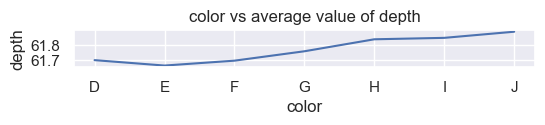

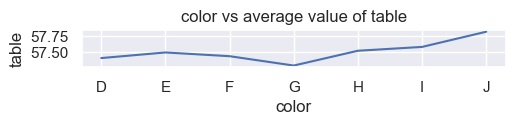

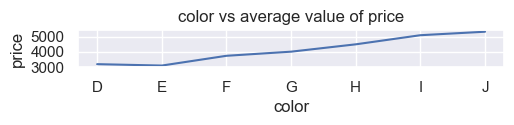

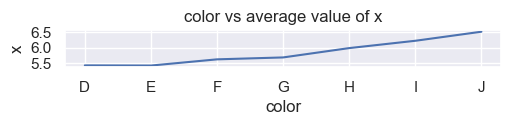

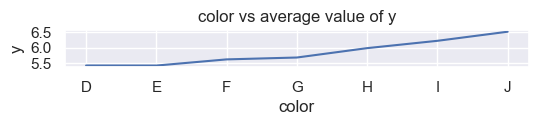

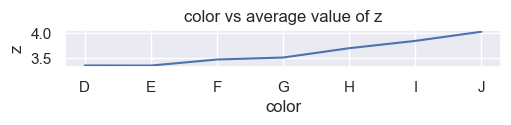

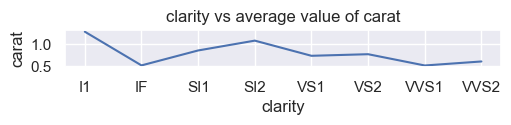

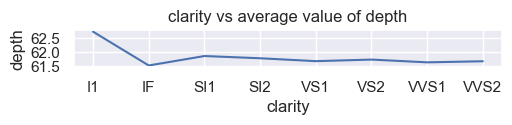

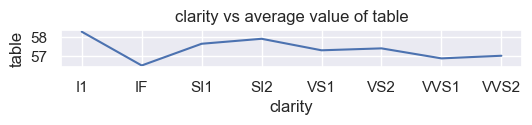

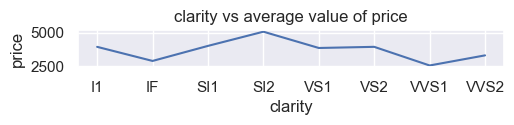

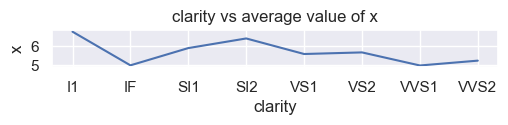

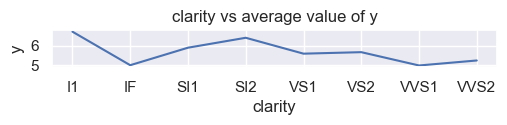

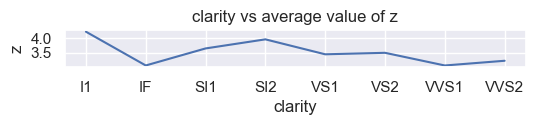

In [30]:
sns.set(rc={"figure.figsize": (20, 10)})
for i,col in enumerate(df_cat.columns):
    for j,num in enumerate(df_num.columns):
        plt.subplot(10, 4, i * len(num_cols) + j + 1)

            ## reset_index() converts array to df
        mean_values = df.groupby(by = col)[num].mean().reset_index()

        sns.lineplot(data = mean_values , x = col,y=num)
        plt.xlabel(col)
        plt.ylabel(num)
        plt.title(f'{col} vs average value of {num}')
        plt.tight_layout()  # Adjust the spacing between subplots
        plt.show()


        

In [ ]:
# display distribution of the independent features
sns.set(rc={"figure.figsize": (20, 18)})
plt.subplot(10,4,1)
mean_values = df.groupby(by = 'cut')['carat'].mean().reset_index()
sns.lineplot(data = mean_values , x = 'cut',y='carat')
plt.subplot(10,4,2)
mean_values = df.groupby(by = 'cut')['depth'].mean().reset_index()
sns.lineplot(data = mean_values , x = 'cut',y='depth')
plt.subplot(10,4,3)
mean_values = df.groupby(by = 'cut')['table'].mean().reset_index()
sns.lineplot(data = mean_values , x = 'cut',y='table')
plt.subplot(10,4,4)
mean_values = df.groupby(by = 'cut')['price'].mean().reset_index()
sns.lineplot(data = mean_values , x = 'cut',y='price')
plt.subplot(10,4,5)
mean_values = df.groupby(by = 'cut')['x'].mean().reset_index()
sns.lineplot(data = mean_values , x = 'cut',y='x')
plt.subplot(10,4,6)
mean_values = df.groupby(by = 'cut')['y'].mean().reset_index()
sns.lineplot(data = mean_values , x = 'cut',y='y')
plt.subplot(10,4,7)
mean_values = df.groupby(by = 'cut')['z'].mean().reset_index()
sns.lineplot(data = mean_values , x = 'cut',y='z')


plt.subplot(10,4,8)
mean_values = df.groupby(by = 'color')['carat'].mean().reset_index()
sns.lineplot(data = mean_values , x = 'color',y='carat')
plt.subplot(10,4,9)
mean_values = df.groupby(by = 'color')['depth'].mean().reset_index()
sns.lineplot(data = mean_values , x = 'color',y='depth')
plt.subplot(10,4,10)
mean_values = df.groupby(by = 'color')['table'].mean().reset_index()
sns.lineplot(data = mean_values , x = 'color',y='table')
plt.subplot(10,4,11)
mean_values = df.groupby(by = 'color')['price'].mean().reset_index()
sns.lineplot(data = mean_values , x = 'color',y='price')
plt.subplot(10,4,12)
mean_values = df.groupby(by = 'color')['x'].mean().reset_index()
sns.lineplot(data = mean_values , x = 'color',y='x')
plt.subplot(10,4,13)
mean_values = df.groupby(by = 'color')['y'].mean().reset_index()
sns.lineplot(data = mean_values , x = 'color',y='y')
plt.subplot(10,4,14)
mean_values = df.groupby(by = 'color')['z'].mean().reset_index()
sns.lineplot(data = mean_values , x = 'color',y='z')


plt.subplot(10,4,15)
mean_values = df.groupby(by = 'clarity')['carat'].mean().reset_index()
sns.lineplot(data = mean_values , x = 'clarity',y='carat')
plt.subplot(10,4,16)
mean_values = df.groupby(by = 'clarity')['depth'].mean().reset_index()
sns.lineplot(data = mean_values , x = 'clarity',y='depth')
plt.subplot(10,4,17)
mean_values = df.groupby(by = 'clarity')['table'].mean().reset_index()
sns.lineplot(data = mean_values , x = 'clarity',y='table')
plt.subplot(10,4,18)
mean_values = df.groupby(by = 'clarity')['price'].mean().reset_index()
sns.lineplot(data = mean_values , x = 'clarity',y='price')
plt.subplot(10,4,19)
mean_values = df.groupby(by = 'clarity')['x'].mean().reset_index()
sns.lineplot(data = mean_values , x = 'clarity',y='x')
plt.subplot(10,4,20)
mean_values = df.groupby(by = 'clarity')['y'].mean().reset_index()
sns.lineplot(data = mean_values , x = 'clarity',y='y')
plt.subplot(10,4,21)
mean_values = df.groupby(by = 'clarity')['z'].mean().reset_index()
sns.lineplot(data = mean_values , x = 'clarity',y='z')


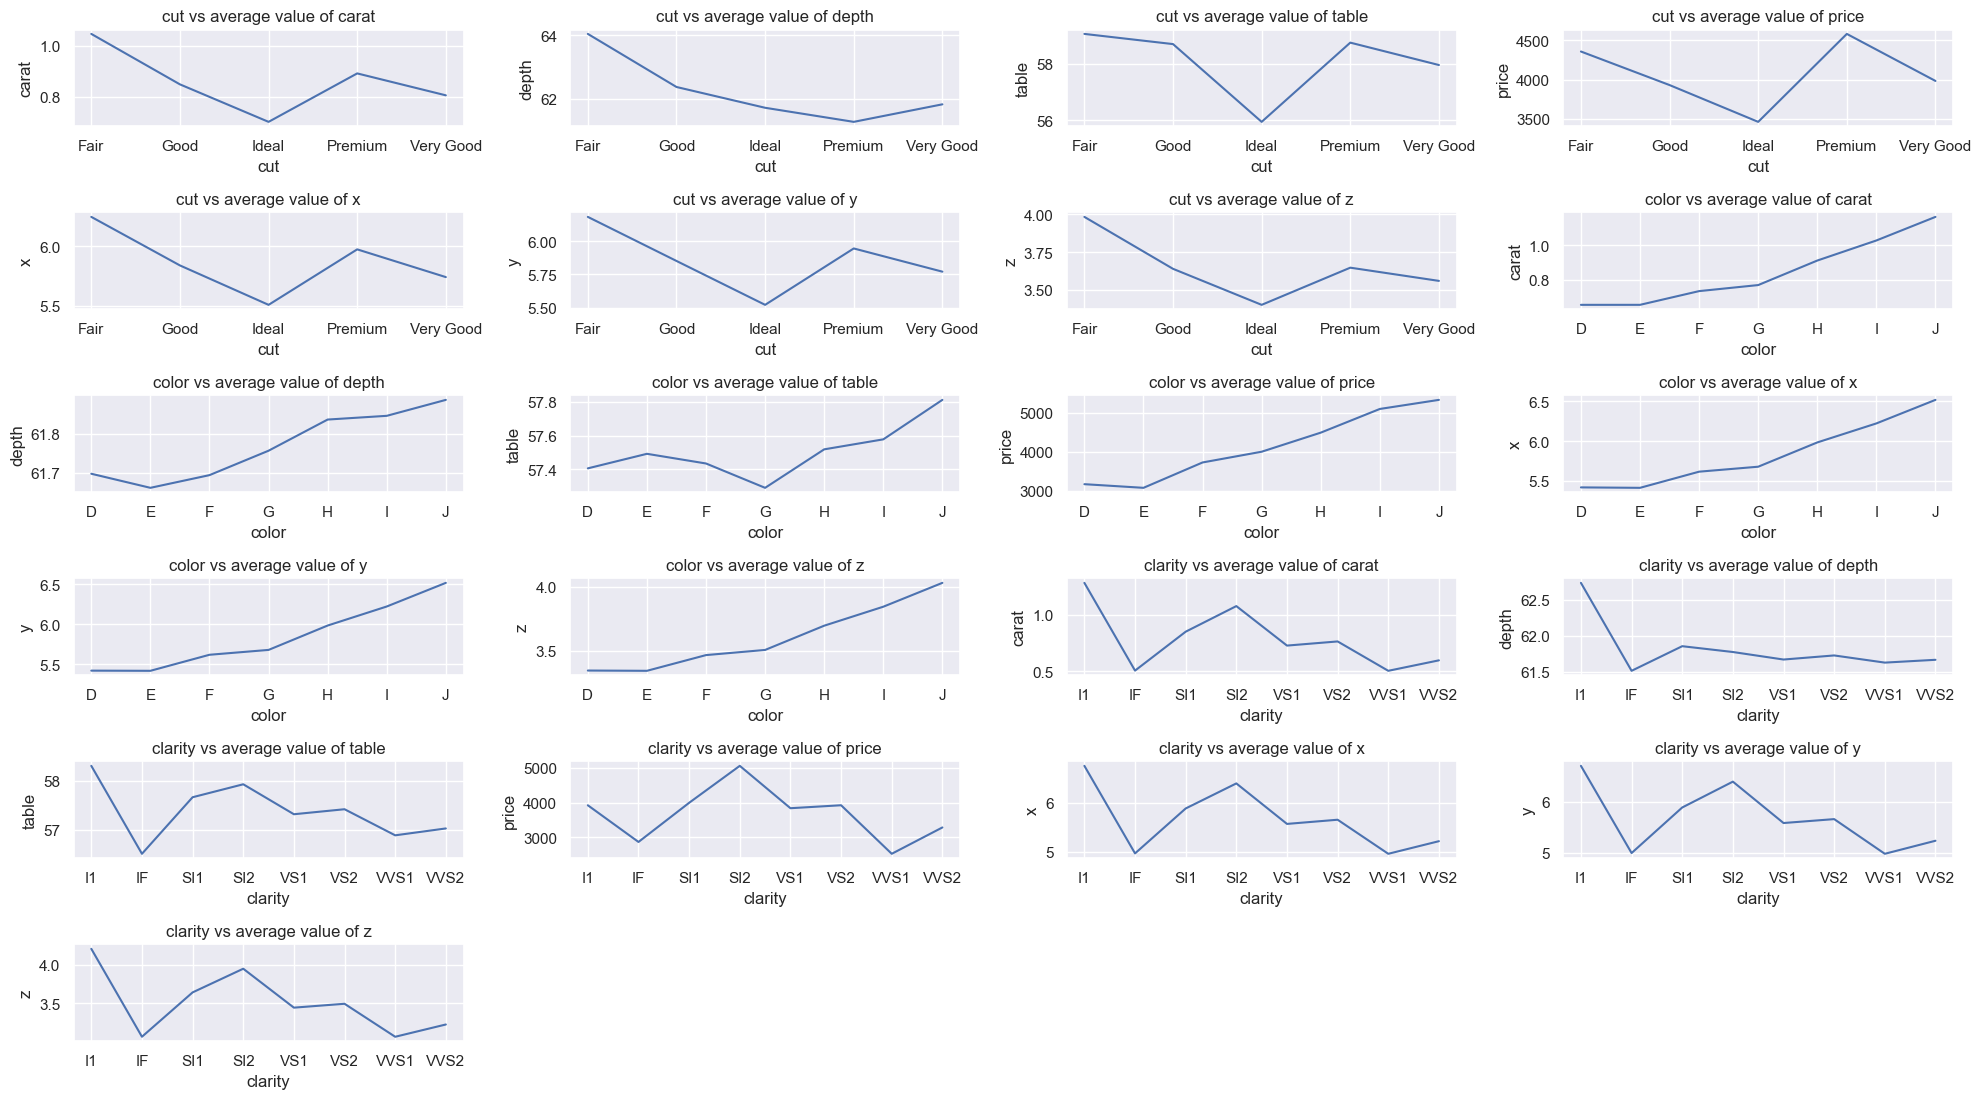

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={"figure.figsize": (20, 18)})

# Define the list of categorical columns
cat_cols = ['cut', 'color', 'clarity']

# Define the list of numerical columns
num_cols = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

# Set up the subplots using a for loop
for i, col in enumerate(cat_cols):
    for j, num_col in enumerate(num_cols):
        plt.subplot(10, 4, i * len(num_cols) + j + 1)

        mean_values = df.groupby(by=col)[num_col].mean().reset_index()

        sns.lineplot(data=mean_values, x=col, y=num_col)
        plt.xlabel(col)
        plt.ylabel(num_col)
        plt.title(f'{col} vs average value of {num_col}')

plt.tight_layout()  # Adjust the spacing between subplots
plt.show()


### cut
- Average value of carat,depth,table,x,y,z is highest for fair, avergae price is highest for premium, fair
### color
- carat, depth, table,x,y,z, is increasing as the color increases the price is highest for coloured diamond j, normally it should be opposite, colourless should be more precious. we can do a annova test to check if the diamond j is more value or of color D
### clarity
- carat, depth, table,x,y,z is    

### OHE - Categorical Features

In [84]:
from sklearn.preprocessing import OneHotEncoder
encode = OneHotEncoder(drop='first')
df_encoded = pd.DataFrame(encode.fit_transform(df_cat).toarray(), columns=encode.get_feature_names_out())

In [85]:
df_encoded

cut_Good  cut_Ideal  cut_Premium  cut_Very Good  color_E  color_F  \
0           0.0        1.0          0.0            0.0      1.0      0.0   
1           0.0        0.0          1.0            0.0      1.0      0.0   
2           1.0        0.0          0.0            0.0      1.0      0.0   
3           0.0        0.0          1.0            0.0      0.0      0.0   
4           1.0        0.0          0.0            0.0      0.0      0.0   
...         ...        ...          ...            ...      ...      ...   
53935       0.0        1.0          0.0            0.0      0.0      0.0   
53936       1.0        0.0          0.0            0.0      0.0      0.0   
53937       0.0        0.0          0.0            1.0      0.0      0.0   
53938       0.0        0.0          1.0            0.0      0.0      0.0   
53939       0.0        1.0          0.0            0.0      0.0      0.0   

       color_G  color_H  color_I  color_J  clarity_IF  clarity_SI1  \
0          0.0      0.0      0.0      0.0         0.0          0.0   
1          0.0      0.0      0.0      0.0         0.0          1.0   
2          0.0      0.0      0.0      0.0         0.0          0.0   
3          0.0      0.0      1.0      0.0         0.0          0.0   
4          0.0      0.0      0.0      1.0         0.0          0.0   
...        ...      ...      ...      ...         ...          ...   
53935      0.0      0.0      0.0      0.0         0.0          1.0   
53936      0.0      0.0      0.0      0.0         0.0          1.0   
53937      0.0      0.0      0.0      0.0         0.0          1.0   
53938      0.0      1.0      0.0      0.0         0.0          0.0   
53939      0.0      0.0      0.0      0.0         0.0          0.0   

       clarity_SI2  clarity_VS1  clarity_VS2  clarity_VVS1  clarity_VVS2  
0              1.0          0.0          0.0           0.0           0.0  
1              0.0          0.0          0.0           0.0           0.0  
2              0.0          1.0          0.0           0.0           0.0  
3              0.0          0.0          1.0           0.0           0.0  
4              1.0          0.0          0.0           0.0           0.0  
...            ...          ...          ...           ...           ...  
53935          0.0          0.0          0.0           0.0           0.0  
53936          0.0          0.0          0.0           0.0           0.0  
53937          0.0          0.0          0.0           0.0           0.0  
53938          1.0          0.0          0.0           0.0           0.0  
53939          1.0          0.0          0.0           0.0           0.0  

[53940 rows x 17 columns]

### Scaling of Numeric Features

In [86]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
df_num = df_num.drop(columns='price')
df_scaled = min_max.fit_transform(df_num)
df_scaled = pd.DataFrame(df_scaled, columns= min_max.get_feature_names_out())
df_scaled

carat     depth     table         x         y         z
0      0.006237  0.513889  0.230769  0.367784  0.067572  0.076415
1      0.002079  0.466667  0.346154  0.362197  0.065195  0.072642
2      0.006237  0.386111  0.423077  0.377095  0.069100  0.072642
3      0.018711  0.538889  0.288462  0.391061  0.071817  0.082704
4      0.022869  0.563889  0.288462  0.404097  0.073854  0.086478
...         ...       ...       ...       ...       ...       ...
53935  0.108108  0.494444  0.269231  0.535382  0.097793  0.110063
53936  0.108108  0.558333  0.230769  0.529795  0.097623  0.113522
53937  0.103950  0.550000  0.326923  0.527002  0.096435  0.111950
53938  0.137214  0.500000  0.288462  0.572626  0.103905  0.117610
53939  0.114345  0.533333  0.230769  0.542831  0.099660  0.114465

[53940 rows x 6 columns]

In [87]:
df_new= pd.concat([df_encoded, df_scaled,df.price], axis=1)

In [88]:
df_new

cut_Good  cut_Ideal  cut_Premium  cut_Very Good  color_E  color_F  \
0           0.0        1.0          0.0            0.0      1.0      0.0   
1           0.0        0.0          1.0            0.0      1.0      0.0   
2           1.0        0.0          0.0            0.0      1.0      0.0   
3           0.0        0.0          1.0            0.0      0.0      0.0   
4           1.0        0.0          0.0            0.0      0.0      0.0   
...         ...        ...          ...            ...      ...      ...   
53935       0.0        1.0          0.0            0.0      0.0      0.0   
53936       1.0        0.0          0.0            0.0      0.0      0.0   
53937       0.0        0.0          0.0            1.0      0.0      0.0   
53938       0.0        0.0          1.0            0.0      0.0      0.0   
53939       0.0        1.0          0.0            0.0      0.0      0.0   

       color_G  color_H  color_I  color_J  ...  clarity_VS2  clarity_VVS1  \
0          0.0      0.0      0.0      0.0  ...          0.0           0.0   
1          0.0      0.0      0.0      0.0  ...          0.0           0.0   
2          0.0      0.0      0.0      0.0  ...          0.0           0.0   
3          0.0      0.0      1.0      0.0  ...          1.0           0.0   
4          0.0      0.0      0.0      1.0  ...          0.0           0.0   
...        ...      ...      ...      ...  ...          ...           ...   
53935      0.0      0.0      0.0      0.0  ...          0.0           0.0   
53936      0.0      0.0      0.0      0.0  ...          0.0           0.0   
53937      0.0      0.0      0.0      0.0  ...          0.0           0.0   
53938      0.0      1.0      0.0      0.0  ...          0.0           0.0   
53939      0.0      0.0      0.0      0.0  ...          0.0           0.0   

       clarity_VVS2     carat     depth     table         x         y  \
0               0.0  0.006237  0.513889  0.230769  0.367784  0.067572   
1               0.0  0.002079  0.466667  0.346154  0.362197  0.065195   
2               0.0  0.006237  0.386111  0.423077  0.377095  0.069100   
3               0.0  0.018711  0.538889  0.288462  0.391061  0.071817   
4               0.0  0.022869  0.563889  0.288462  0.404097  0.073854   
...             ...       ...       ...       ...       ...       ...   
53935           0.0  0.108108  0.494444  0.269231  0.535382  0.097793   
53936           0.0  0.108108  0.558333  0.230769  0.529795  0.097623   
53937           0.0  0.103950  0.550000  0.326923  0.527002  0.096435   
53938           0.0  0.137214  0.500000  0.288462  0.572626  0.103905   
53939           0.0  0.114345  0.533333  0.230769  0.542831  0.099660   

              z  price  
0      0.076415    326  
1      0.072642    326  
2      0.072642    327  
3      0.082704    334  
4      0.086478    335  
...         ...    ...  
53935  0.110063   2757  
53936  0.113522   2757  
53937  0.111950   2757  
53938  0.117610   2757  
53939  0.114465   2757  

[53940 rows x 24 columns]

In [89]:
df_new.isna().sum()

cut_Good         0
cut_Ideal        0
cut_Premium      0
cut_Very Good    0
color_E          0
color_F          0
color_G          0
color_H          0
color_I          0
color_J          0
clarity_IF       0
clarity_SI1      0
clarity_SI2      0
clarity_VS1      0
clarity_VS2      0
clarity_VVS1     0
clarity_VVS2     0
carat            0
depth            0
table            0
x                0
y                0
z                0
price            0
dtype: int64

In [90]:
import statsmodels.api as sm

In [91]:
X = df_new.drop(columns='price')
y = df_new.price

**F-STAT**

**H0: All co-efficients = 0, model is insignificant**

**H1: One of the co-efficinets, model is significant**

In [92]:
X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                 2.688e+04
Date:                Fri, 16 Jun 2023   Prob (F-statistic):               0.00
Time:                        00:38:03   Log-Likelihood:            -4.5573e+05
No. Observations:               53940   AIC:                         9.115e+05
Df Residuals:                   53916   BIC:                         9.117e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           553.8251    166.536      3.326

**HYPOTHESIS FOR T-TEST**

**H0 : Co-efficint for that feature = 0, making the feature insignificant**

**H1 : Co-efficient for that feature not equal to 0, making that feature significant** 


### Inference 
- We know that x,y & z are highly correlated with each other
- This inturn induces multicolinearity, which results in the high p-value 
- This p-value is however, the effect of multicolinearity and we cannot conclude the significance of the features y & z
- My & z may actually be significant variables which are masked by the effect of multicolinearity 
- Thus, we proceed further by treating these feautres for multicolinearity 
- One approach is to combine the features x, y, & z into a single feature column 

# FIT MODELS

In [110]:
def regression_models(df,label):
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
    from sklearn.linear_model import LinearRegression,Lasso, Ridge
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import mean_absolute_percentage_error
    import statsmodels.api as sm
    from sklearn.preprocessing import MinMaxScaler
    import warnings
    warnings.filterwarnings("ignore")
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.metrics import mean_squared_error
    from sklearn.preprocessing import LabelEncoder
    from math import sqrt
    from sklearn.linear_model import ElasticNet
    from sklearn.neighbors import KNeighborsRegressor
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.ensemble import AdaBoostRegressor
    from sklearn.ensemble import RandomForestRegressor

    X = df.drop(columns = [label])
    y = df[[label]]
    
    Regressor = []
    R_sq_train = []
    R_sq_test = []
    train_MSE = []
    test_MSE = []
    train_MAPE = []
    test_MAPE = []
    MAPE_percent = []
    # Split dataset into training and test sets
    X_train, X_test,y_train,y_test = train_test_split(X,y, test_size=0.25, random_state=42)

    print('Linear Regression')
    lm = LinearRegression()
    model = lm.fit(X_train,y_train)
    yhat_train = model.predict(X_train)
    #LR_r_square_train = model.score(X_train,y_train)

    yhat_test = model.predict(X_test)
    #LR_r_square_test = model.score(X_test,yhat_test)



    Regressor.append('Linear Regression')
    R_sq_train.append(model.score(X_train,y_train))
    R_sq_test.append(model.score(X_test,y_test))
    train_MSE.append(mean_squared_error(y_train,yhat_train))
    test_MSE.append(mean_squared_error(y_test, yhat_test))
    train_MAPE.append(mean_absolute_percentage_error(y_train,yhat_train))
    test_MAPE.append(mean_absolute_percentage_error(y_test,yhat_test))
    
    
    train = mean_absolute_percentage_error(y_train,yhat_train)
    test = mean_absolute_percentage_error(y_test,yhat_test)
    mape_percent_lr = np.mean(np.abs((train-test)/train))*100
    
    
    MAPE_percent.append(mape_percent_lr)

    print('-------------------------------------------------------------------------')
    
    print('Lasso Regression')
    ls = Lasso()
    model_ls = ls.fit(X_train,y_train)
    yhat_train = model_ls.predict(X_train)
    #Ls_r_square_train = model_ls.score(X_train,yhat_train)

   
    yhat_test = model_ls.predict(X_test)
    #Ls_r_square_test = model_ls.score(X_test,yhat_test)

   

    Regressor.append('Lasso')
    R_sq_train.append(model_ls.score(X_train,y_train))
    R_sq_test.append(model_ls.score(X_test,y_test))
    train_MSE.append(mean_squared_error(y_train,yhat_train))
    test_MSE.append(mean_squared_error(y_test, yhat_test))
    train_MAPE.append(mean_absolute_percentage_error(y_train,yhat_train))
    test_MAPE.append(mean_absolute_percentage_error(y_test,yhat_test))
    
    train = mean_absolute_percentage_error(y_train,yhat_train)
    test = mean_absolute_percentage_error(y_test,yhat_test)
    mape_percent_ls = np.mean(np.abs((train-test)/train))*100
    
    
    MAPE_percent.append(mape_percent_ls)
    
    
    print('-------------------------------------------------------------------------')
    
    print('Ridge Regression')
    ri = Ridge()
    model_ri = ri.fit(X_train,y_train)
    yhat_train = model_ri.predict(X_train)
    #ri_r_square_train = model_ri.score(X_train,yhat_train)

   
    yhat_test = model_ri.predict(X_test)
    #Ls_r_square_test = model_ri.score(X_test,yhat_test)

    

    Regressor.append('Ridge')
    R_sq_train.append(model_ri.score(X_train,y_train))
    R_sq_test.append(model_ri.score(X_test,y_test))
    train_MSE.append(mean_squared_error(y_train,yhat_train))
    test_MSE.append(mean_squared_error(y_test, yhat_test))
    train_MAPE.append(mean_absolute_percentage_error(y_train,yhat_train))
    test_MAPE.append(mean_absolute_percentage_error(y_test,yhat_test))
    
    train = mean_absolute_percentage_error(y_train,yhat_train)
    test = mean_absolute_percentage_error(y_test,yhat_test)
    mape_precent_ri = np.mean(np.abs((train-test)/train))*100
    
    
    MAPE_percent.append(mape_precent_ri)
    
    print('-------------------------------------------------------------------------')
    
    print('Elastic net Regression')
    en = ElasticNet(alpha=0.5, l1_ratio=0.5)
    model_en = en.fit(X_train,y_train)
    yhat_train = model_en.predict(X_train)
    #en_r_square_train = model_en.score(X_train,yhat_train)

 
    yhat_test = model_en.predict(X_test)
    #Ls_r_square_test = model_en.score(X_test,yhat_test)

    
    Regressor.append('elastic net')
    R_sq_train.append(model_en.score(X_train,y_train))
    R_sq_test.append(model_en.score(X_test,y_test))
    train_MSE.append(mean_squared_error(y_train,yhat_train))
    test_MSE.append(mean_squared_error(y_test, yhat_test))
    train_MAPE.append(mean_absolute_percentage_error(y_train,yhat_train))
    test_MAPE.append(mean_absolute_percentage_error(y_test,yhat_test))
    
    train = mean_absolute_percentage_error(y_train,yhat_train)
    test = mean_absolute_percentage_error(y_test,yhat_test)
    mape_precent_en = np.mean(np.abs((train-test)/train))*100
    
    
    MAPE_percent.append(mape_precent_en)
    
    
    
    print('-------------------------------------------------------------------------')

    print('Ada boost Regression')
    ada = AdaBoostRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
    model_ada = ada.fit(X_train,y_train)
    yhat_train = model_ada.predict(X_train)
    #ada_r_square_train = model_ada.score(X_train,yhat_train)

    
    yhat_test = model_ada.predict(X_test)
    #ada_r_square_test = model_ada.score(X_test,yhat_test)

   

    Regressor.append('Ada boost regression')
    R_sq_train.append(model_ada.score(X_train,y_train))
    R_sq_test.append(model_ada.score(X_test,y_test))
    train_MSE.append(mean_squared_error(y_train,yhat_train))
    test_MSE.append(mean_squared_error(y_test, yhat_test))
    train_MAPE.append(mean_absolute_percentage_error(y_train,yhat_train))
    test_MAPE.append(mean_absolute_percentage_error(y_test,yhat_test))
    
    train = mean_absolute_percentage_error(y_train,yhat_train)
    test = mean_absolute_percentage_error(y_test,yhat_test)
    mape_precent_ada = np.mean(np.abs((train-test)/train))*100
    
    
    MAPE_percent.append(mape_precent_ada)
    
    print('-------------------------------------------------------------------------')

    print('Random Forest Regreesor')
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    model_rf = rf.fit(X_train,y_train)
    yhat_train = model_rf.predict(X_train)
    #rf_r_square_train = model_rf.score(X_train,yhat_train)

    
    yhat_test = model_rf.predict(X_test)
    #rf_r_square_test = model_rf.score(X_test,yhat_test)

    mse_test = mean_squared_error(y_test, yhat_test)
    mape_test = mean_absolute_percentage_error(y_test,yhat_test)

    Regressor.append('Random Forest regressor')
    R_sq_train.append(model_rf.score(X_train,y_train))
    R_sq_test.append(model_rf.score(X_test,y_test))
    
    train_MSE.append(mean_squared_error(y_train,yhat_train))
    test_MSE.append(mean_squared_error(y_test, yhat_test))
    train_MAPE.append(mean_absolute_percentage_error(y_train,yhat_train))
    test_MAPE.append(mean_absolute_percentage_error(y_test,yhat_test))
    
    train = mean_absolute_percentage_error(y_train,yhat_train)
    test = mean_absolute_percentage_error(y_test,yhat_test)
    mape_precent_rf = np.mean(np.abs((train-test)/train))*100
    
    
    MAPE_percent.append(mape_precent_rf)
    
    
    print('-------------------------------------------------------------------------')

    print('DT Regression')
    model_dt = DecisionTreeRegressor(random_state=42)
    model_dt.fit(X_train, y_train)
    yhat_train = model_dt.predict(X_train)
    #LR_r_square_train = model_dt.score(X_train,yhat_train)
    yhat_test = model_dt.predict(X_test)
    #LR_r_square_test = model_dt.score(X_test,yhat_test)


    Regressor.append('DT Regression')
    R_sq_train.append(model_dt.score(X_train,y_train))
    R_sq_test.append(model_dt.score(X_test,y_test))
    train_MSE.append(mean_squared_error(y_train,yhat_train))
    test_MSE.append(mean_squared_error(y_test, yhat_test))
    train_MAPE.append(mean_absolute_percentage_error(y_train,yhat_train))
    test_MAPE.append(mean_absolute_percentage_error(y_test,yhat_test))
    
    train = mean_absolute_percentage_error(y_train,yhat_train)
    test = mean_absolute_percentage_error(y_test,yhat_test)
    mape_precent_dt = np.mean(np.abs((train-test)/train))*100
    
    
    MAPE_percent.append(mape_precent_dt)


    print('-------------------------------------------------------------------------')

    print('KNN Regression')
    modelk = KNeighborsRegressor(n_neighbors = 3)
    modelk.fit(X_train, y_train)
    yhat_train = modelk.predict(X_train)
    #LR_r_square_train = model_dt.score(X_train,yhat_train)
    yhat_test = modelk.predict(X_test)
    #LR_r_square_test = modelk.score(X_test,yhat_test)

    Regressor.append('KNN Regression')
    R_sq_train.append(modelk.score(X_train,y_train))
    R_sq_test.append(modelk.score(X_test,y_test))
    train_MSE.append(mean_squared_error(y_train,yhat_train))
    test_MSE.append(mean_squared_error(y_test, yhat_test))
    train_MAPE.append(mean_absolute_percentage_error(y_train,yhat_train))
    test_MAPE.append(mean_absolute_percentage_error(y_test,yhat_test))
    
    train = mean_absolute_percentage_error(y_train,yhat_train)
    test = mean_absolute_percentage_error(y_test,yhat_test)
    mape_precent_knn = np.mean(np.abs((train-test)/train))*100
    
    
    MAPE_percent.append(mape_precent_knn)

    results = {
        "Regressor": Regressor,
        "R_sq_train": R_sq_train,
        "R_sq_test": R_sq_test,
        "train_MSE": train_MSE,
        "test_MSE": test_MSE,
        "train_MAPE": train_MAPE,
        "test_MAPE": test_MAPE,
        "MAPE_percent":MAPE_percent
    }
    return pd.DataFrame(results)

In [94]:
regression_models(df_new,'price')

Linear Regression
-------------------------------------------------------------------------
Lasso Regression
-------------------------------------------------------------------------
Ridge Regression
-------------------------------------------------------------------------
Elastic net Regression
-------------------------------------------------------------------------
Ada boost Regression
-------------------------------------------------------------------------
Random Forest Regreesor
-------------------------------------------------------------------------
DT Regression
-------------------------------------------------------------------------
KNN Regression


Regressor  R_sq_train  R_sq_test     train_MSE      test_MSE  \
0        Linear Regression    0.919848   0.919568  1.281111e+06  1.263570e+06   
1                    Lasso    0.918833   0.918675  1.297337e+06  1.277597e+06   
2                    Ridge    0.919552   0.919203  1.285833e+06  1.269299e+06   
3              elastic net    0.146542   0.148189  1.364124e+07  1.338168e+07   
4     Ada boost regression    0.873223   0.870451  2.026340e+06  2.035167e+06   
5  Random Forest regressor    0.996606   0.975169  5.424189e+04  3.900819e+05   
6            DT Regression    0.999995   0.956883  7.903813e+01  6.773489e+05   
7           KNN Regression    0.983326   0.964667  2.665024e+05  5.550726e+05   

   train_MAPE  test_MAPE  MAPE_percent  
0    0.392275   0.392062      0.054333  
1    0.400203   0.399507      0.173881  
2    0.399396   0.398943      0.113334  
3    1.679053   1.685326      0.373587  
4    0.249359   0.252279      1.171014  
5    0.026558   0.071850    170.538732  
6    0.000211   0.091716  43307.467977  
7    0.071615   0.105368     47.130778

# [B] MODEL 2
### Transform the label using log transformation and check performance 

In [128]:
df['price'] = df['price'].apply(np.log)

In [129]:
df['price']

0        5.786897
1        5.786897
2        5.789960
3        5.811141
4        5.814131
           ...   
53935    7.921898
53936    7.921898
53937    7.921898
53938    7.921898
53939    7.921898
Name: price, Length: 53940, dtype: float64

<AxesSubplot:xlabel='price', ylabel='Density'>

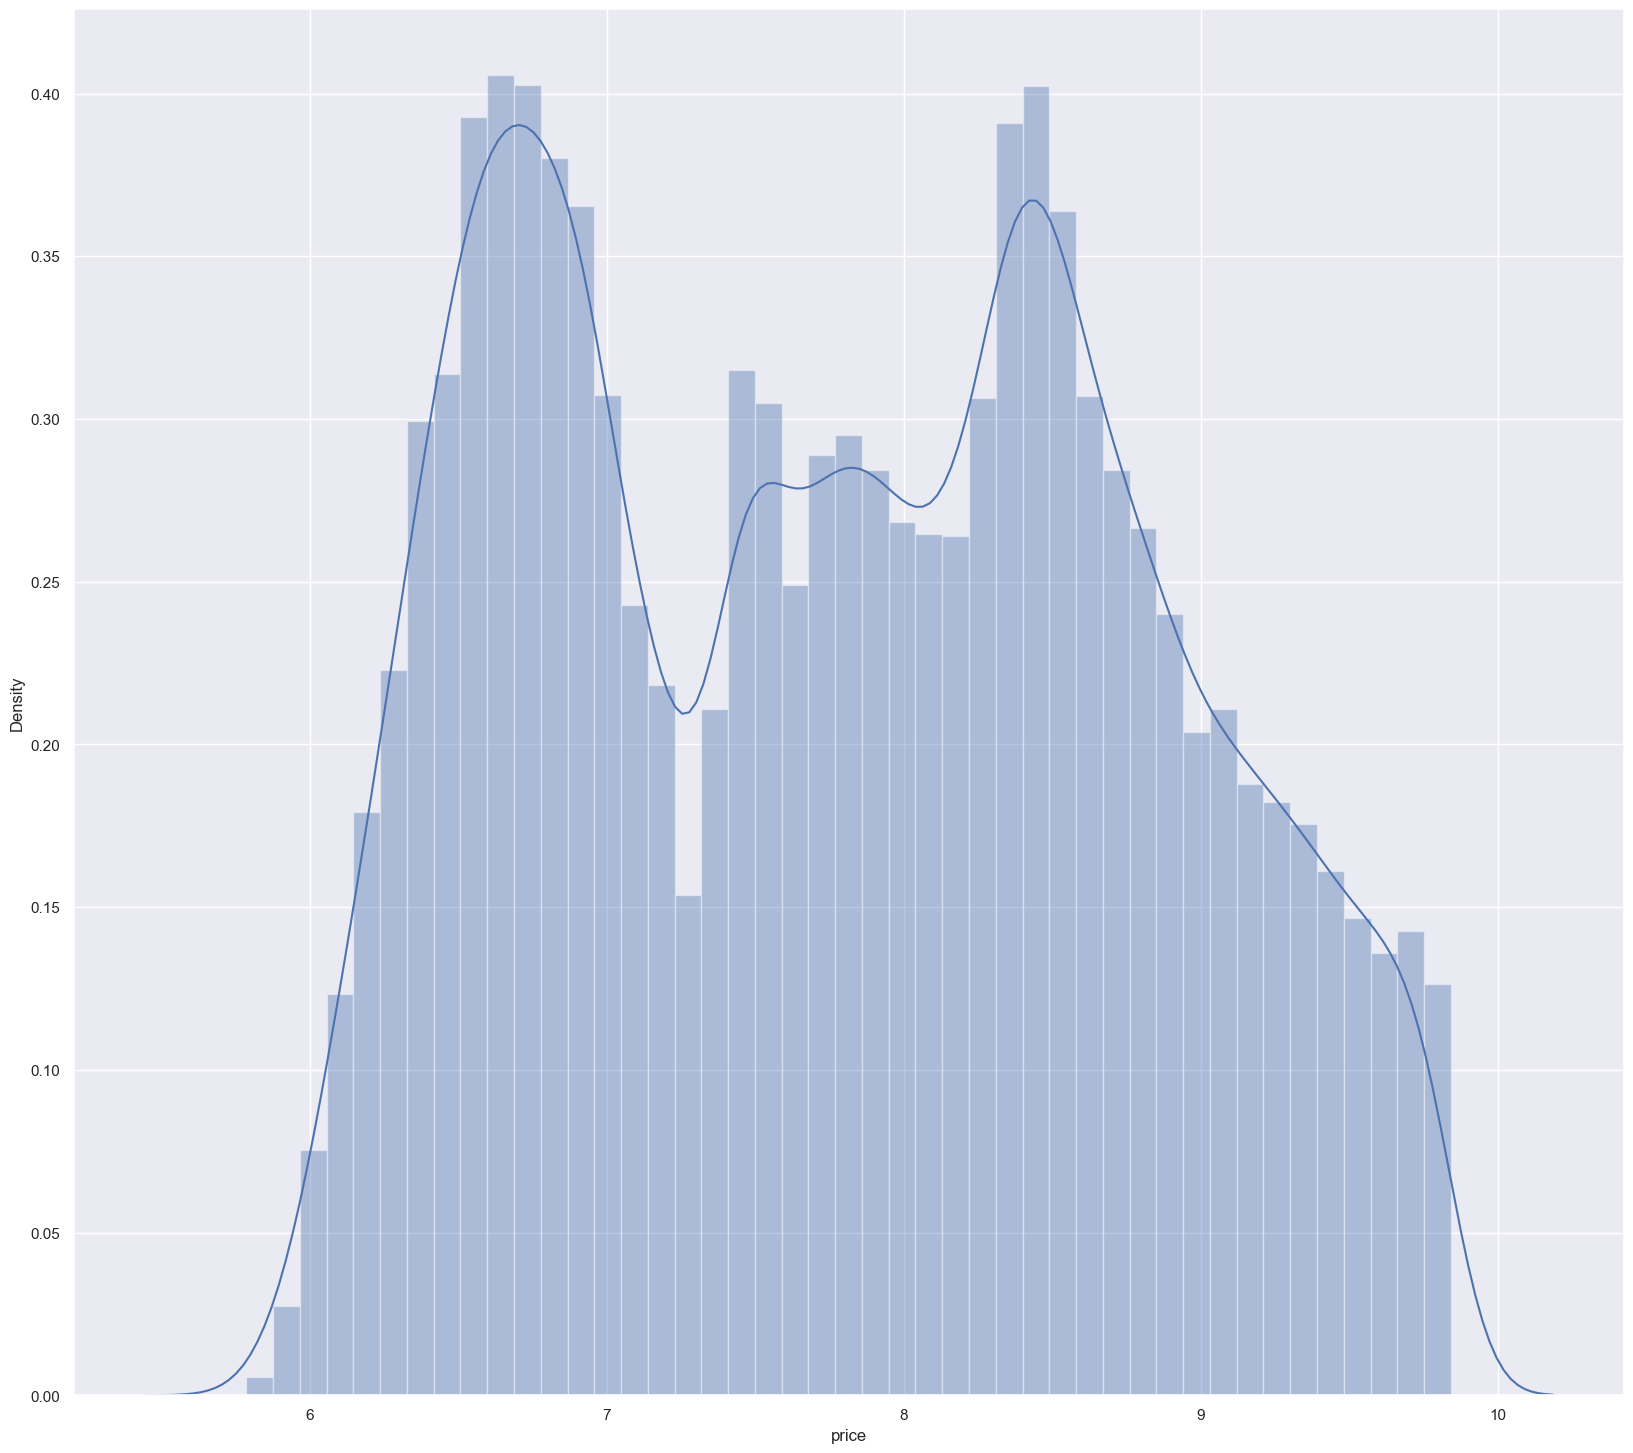

In [93]:
sns.distplot(df['price'])

- Do one hot encoding , scale columns , then concat with new price

### OHE - Categorical Features

In [166]:
from sklearn.preprocessing import OneHotEncoder
encode = OneHotEncoder(drop='first')
df_encoded = pd.DataFrame(encode.fit_transform(df_cat).toarray(), columns=encode.get_feature_names_out())

In [167]:
df_encoded

cut_Good  cut_Ideal  cut_Premium  cut_Very Good  color_E  color_F  \
0           0.0        1.0          0.0            0.0      1.0      0.0   
1           0.0        0.0          1.0            0.0      1.0      0.0   
2           1.0        0.0          0.0            0.0      1.0      0.0   
3           0.0        0.0          1.0            0.0      0.0      0.0   
4           1.0        0.0          0.0            0.0      0.0      0.0   
...         ...        ...          ...            ...      ...      ...   
53935       0.0        1.0          0.0            0.0      0.0      0.0   
53936       1.0        0.0          0.0            0.0      0.0      0.0   
53937       0.0        0.0          0.0            1.0      0.0      0.0   
53938       0.0        0.0          1.0            0.0      0.0      0.0   
53939       0.0        1.0          0.0            0.0      0.0      0.0   

       color_G  color_H  color_I  color_J  clarity_IF  clarity_SI1  \
0          0.0      0.0      0.0      0.0         0.0          0.0   
1          0.0      0.0      0.0      0.0         0.0          1.0   
2          0.0      0.0      0.0      0.0         0.0          0.0   
3          0.0      0.0      1.0      0.0         0.0          0.0   
4          0.0      0.0      0.0      1.0         0.0          0.0   
...        ...      ...      ...      ...         ...          ...   
53935      0.0      0.0      0.0      0.0         0.0          1.0   
53936      0.0      0.0      0.0      0.0         0.0          1.0   
53937      0.0      0.0      0.0      0.0         0.0          1.0   
53938      0.0      1.0      0.0      0.0         0.0          0.0   
53939      0.0      0.0      0.0      0.0         0.0          0.0   

       clarity_SI2  clarity_VS1  clarity_VS2  clarity_VVS1  clarity_VVS2  
0              1.0          0.0          0.0           0.0           0.0  
1              0.0          0.0          0.0           0.0           0.0  
2              0.0          1.0          0.0           0.0           0.0  
3              0.0          0.0          1.0           0.0           0.0  
4              1.0          0.0          0.0           0.0           0.0  
...            ...          ...          ...           ...           ...  
53935          0.0          0.0          0.0           0.0           0.0  
53936          0.0          0.0          0.0           0.0           0.0  
53937          0.0          0.0          0.0           0.0           0.0  
53938          1.0          0.0          0.0           0.0           0.0  
53939          1.0          0.0          0.0           0.0           0.0  

[53940 rows x 17 columns]

### Scaling of Numeric Features

In [168]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
df_num = df_num.drop(columns='price')
df_scaled = min_max.fit_transform(df_num)
df_scaled = pd.DataFrame(df_scaled, columns= min_max.get_feature_names_out())
df_scaled

KeyError: "['price'] not found in axis"

In [127]:
df.price

0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53940, dtype: int64

In [49]:
df_new_transformd= pd.concat([df_encoded, df_scaled,df.price], axis=1)

## **LInear Regression**

In [50]:
X= df_new_transformd.drop(columns='price')
y =df_new_transformd['price']
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size=0.25, random_state=42)

print('Linear Regression')
lm = LinearRegression()
model = lm.fit(X_train,y_train)
yhat_train = model.predict(X_train)
#LR_r_square_train = model.score(X_train,y_train)

yhat_test = model.predict(X_test)
#LR_r_square_test = model.score(X_test,yhat_test)



R_sq_train = model.score(X_train,y_train)
train_MSE = mean_squared_error(y_train,yhat_train)
test_MSE = mean_squared_error(y_test, yhat_test)
train_MAPE = mean_absolute_percentage_error(y_train,yhat_train)
test_MAPE = mean_absolute_percentage_error(y_test,yhat_test)


train = mean_absolute_percentage_error(y_train,yhat_train)
test = mean_absolute_percentage_error(y_test,yhat_test)
mape_percent_lr = np.mean(np.abs((train-test)/train))*100


print(f" R square for train model is {R_sq_train}")
print(f" Mse of train data is {train_MSE}")
print(f"Mse of test data is {test_MSE}")
print(f"MAPE of train data is {train_MAPE}")
print(f"MAPE of test data is {test_MAPE}")

Linear Regression
 R square for train model is 0.968609481537473
 Mse of train data is 0.03235638941584348
Mse of test data is 0.026323975384493145
MAPE of train data is 0.01457113473264944
MAPE of test data is 0.01462558324156359


<AxesSubplot:xlabel='price'>

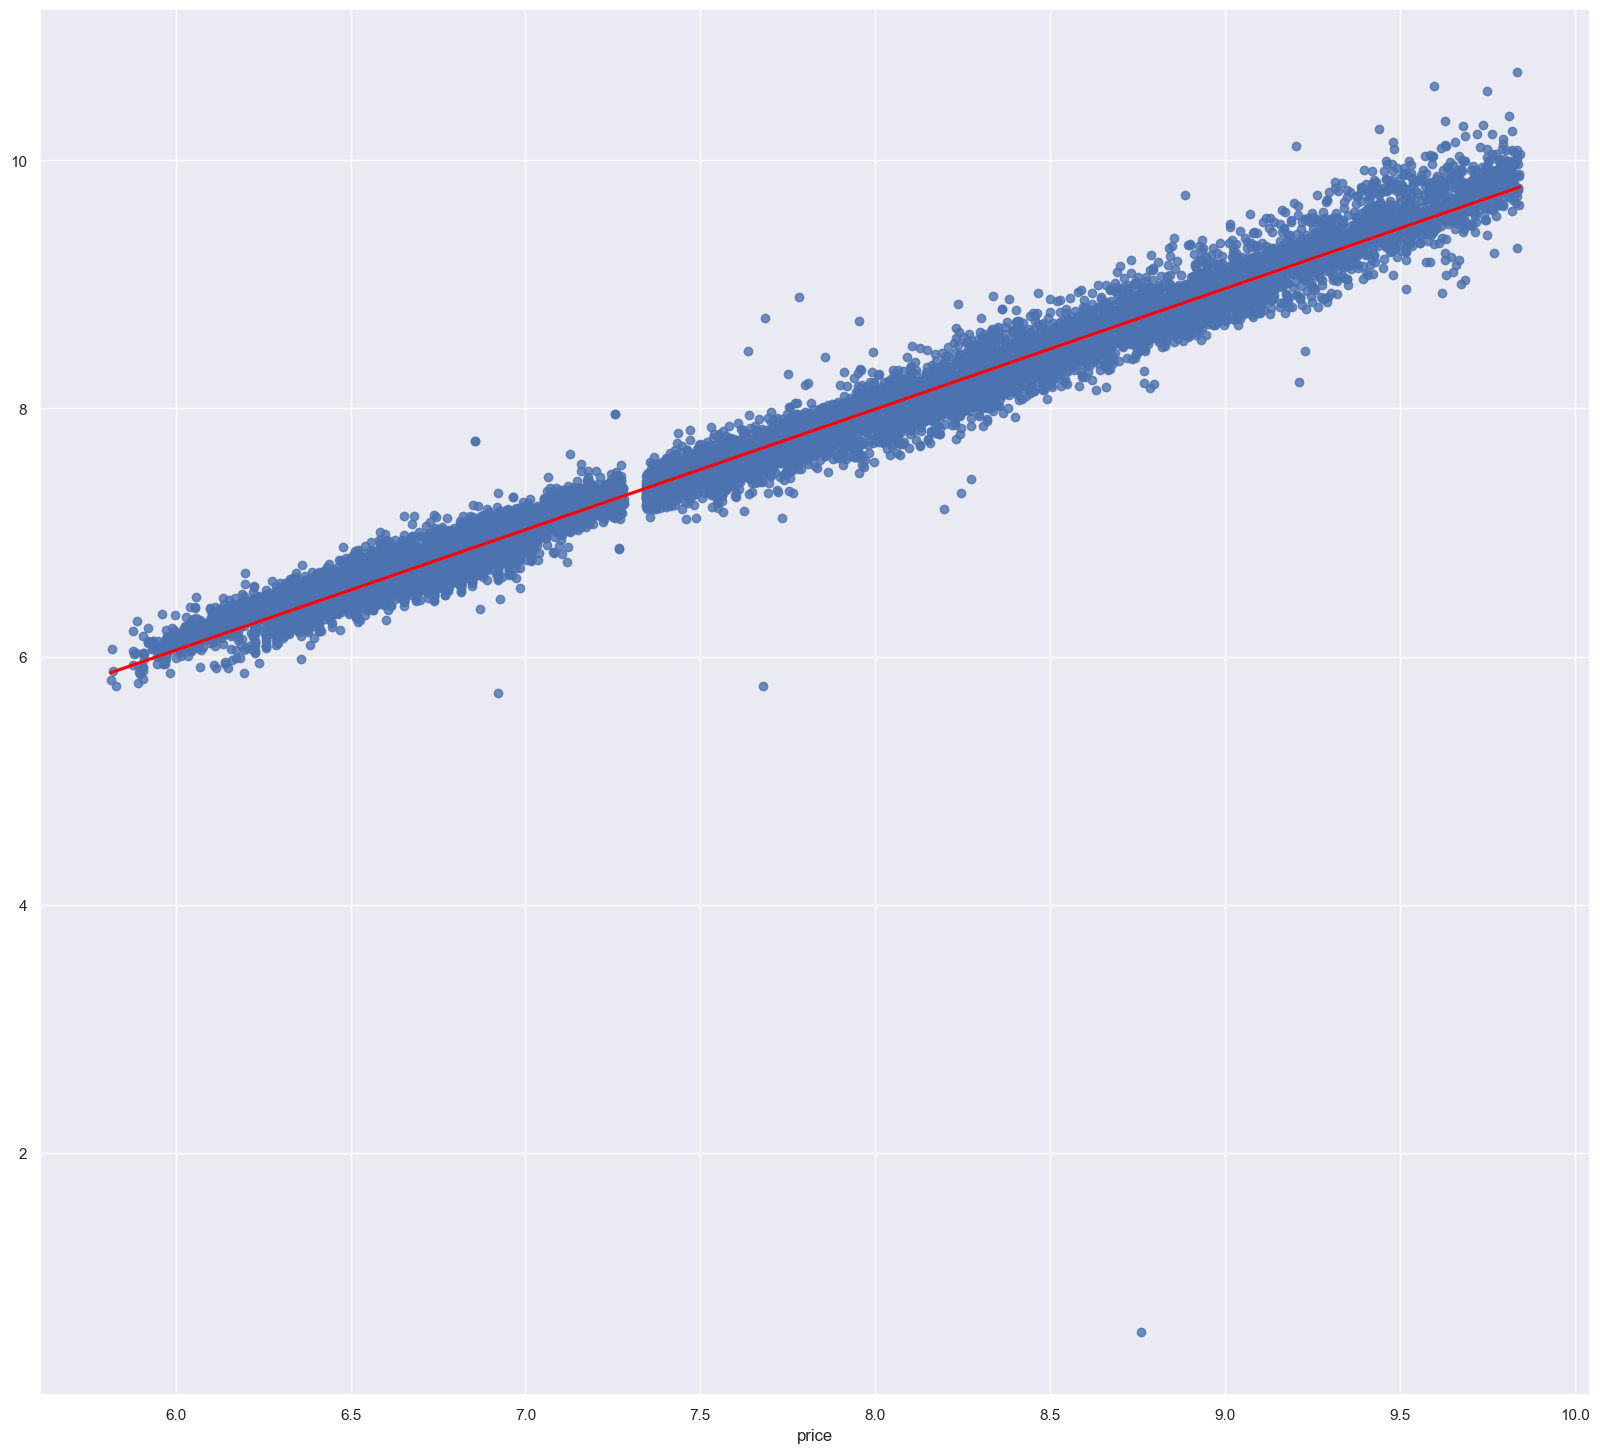

In [71]:
sns.regplot(y_test,yhat_test, line_kws={'color': 'red'})

### plot the line 

In [78]:
yhat_train

array([6.42474381, 7.69500731, 8.275566  , ..., 6.94277208, 7.80005628,
       8.79446528])

In [72]:
# Plot the data points
plt.scatter(X_train,yhat_train.reset_index() ,label = 'price')

# Define the line equation
intercept = lm.intercept_
coefficients = lm.coef_
y_line = intercept + coefficients * X_train

# Add the regression line to the plot
plt.plot(X_train, y_line, color='red', label='Regression Line')

# Customize the plot
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression Model')
plt.legend()
plt.show()








AttributeError: 'numpy.ndarray' object has no attribute 'reset_index'

## Plot q-q plot of residuals

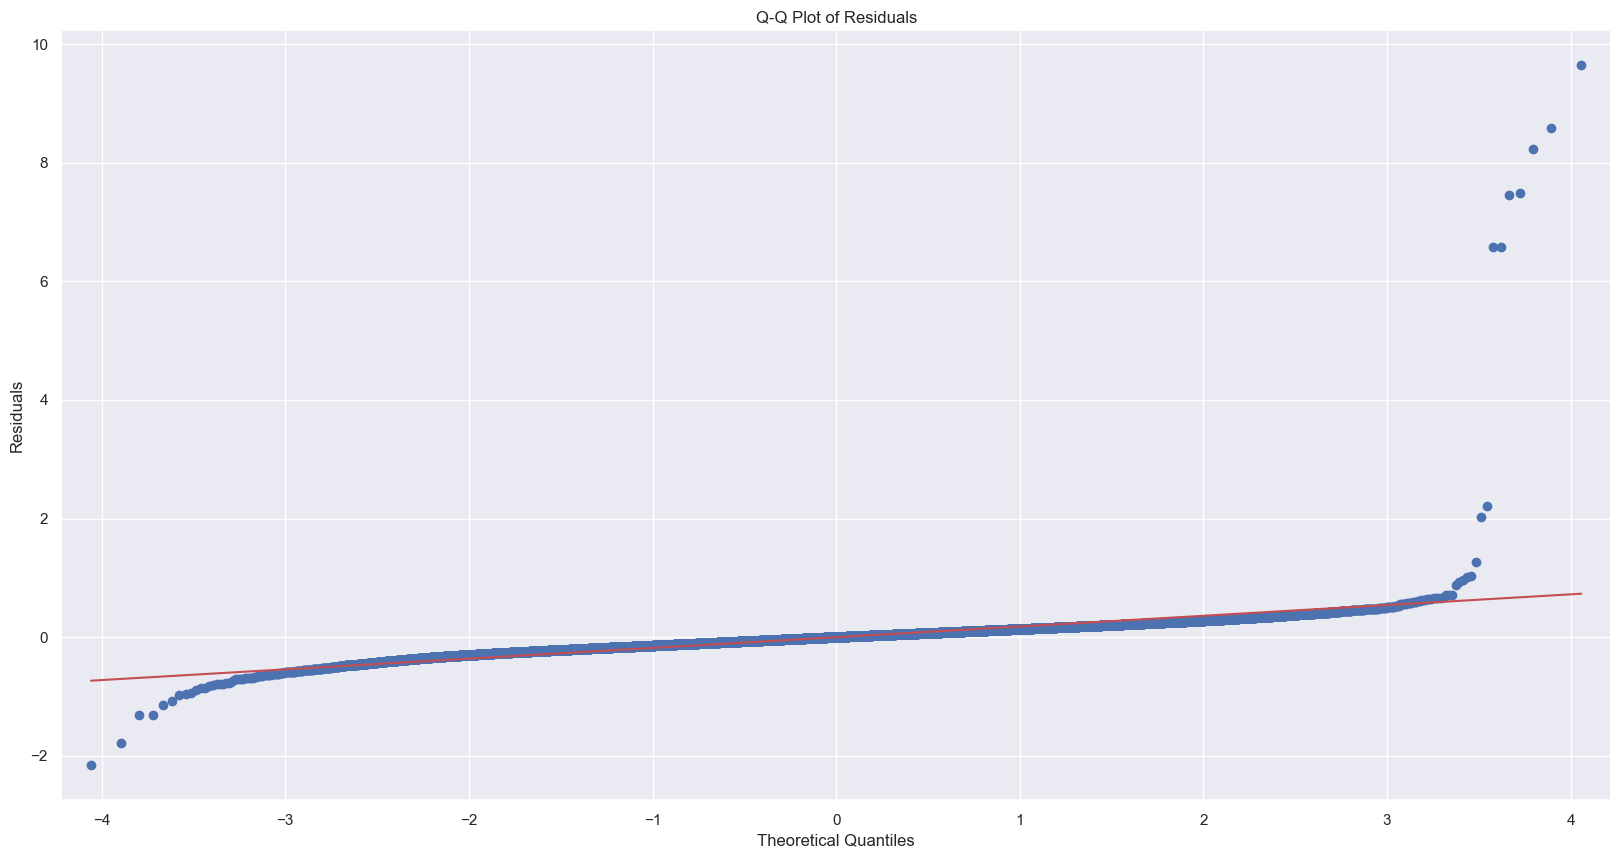

In [49]:
import pandas as pd
import statsmodels.api as sm

# Assuming you have a pandas DataFrame called 'data' with predictor and response variables
# Replace 'data', 'x_column', and 'y_column' with your actual DataFrame and column names

# Extract predictor and response variables
X= df_new_transformd.drop(columns='price')
y =df_new_transformd['price']

# Add constant term to predictor variables
X = sm.add_constant(X)

# Fit linear regression model
model = sm.OLS(y_train, X_train)
results = model.fit()

residuals = results.resid


from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt

# Generate the Q-Q plot of residuals
qqplot(residuals, line='s')

# Show the plot
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Residuals")
plt.title("Q-Q Plot of Residuals")
plt.show()


### Plot q-q for test data 

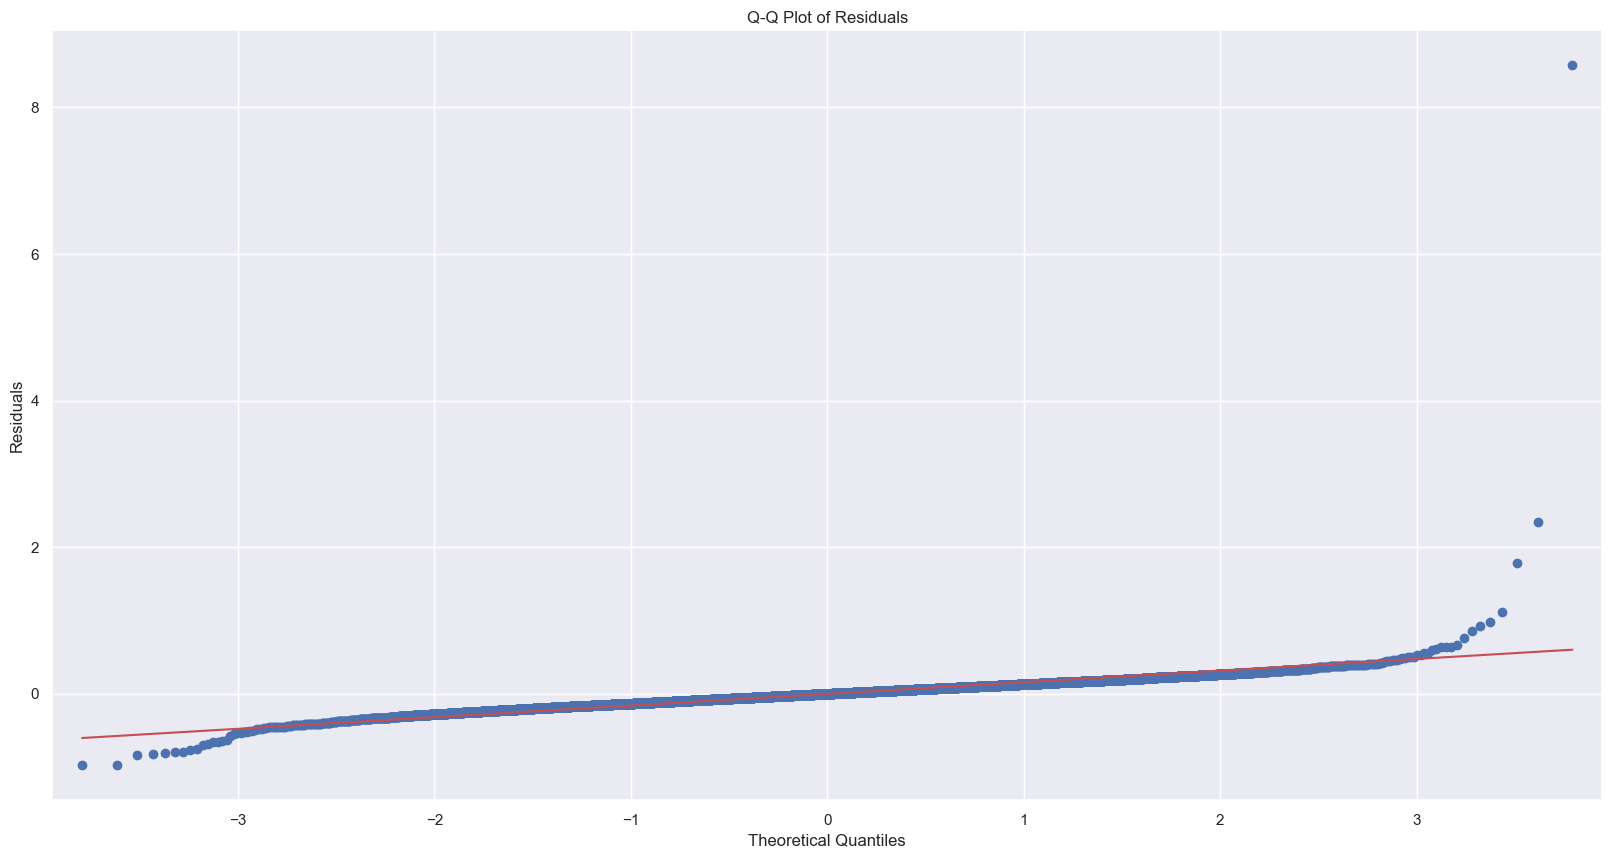

In [50]:
import pandas as pd
import statsmodels.api as sm

# Assuming you have a pandas DataFrame called 'data' with predictor and response variables
# Replace 'data', 'x_column', and 'y_column' with your actual DataFrame and column names

# Extract predictor and response variables
X= df_new_transformd.drop(columns='price')
y =df_new_transformd['price']

# Add constant term to predictor variables
X = sm.add_constant(X)

# Fit linear regression model
model = sm.OLS(y_test, X_test)
results = model.fit()

residuals = results.resid


from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt

# Generate the Q-Q plot of residuals
qqplot(residuals, line='s')

# Show the plot
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Residuals")
plt.title("Q-Q Plot of Residuals")
plt.show()


##  Lasso Regression

In [119]:
print('Lasso Regression')
ls = Lasso()
model_ls = ls.fit(X_train,y_train)
yhat_train = model_ls.predict(X_train)
#Ls_r_square_train = model_ls.score(X_train,yhat_train)


yhat_test = model_ls.predict(X_test)
#Ls_r_square_test = model_ls.score(X_test,yhat_test)



R_sq_train = model_ls.score(X_train,y_train)
R_sq_test = model_ls.score(X_test,y_test)
train_MSE = mean_squared_error(y_train,yhat_train)
test_MSE = mean_squared_error(y_test, yhat_test)
train_MAPE = mean_absolute_percentage_error(y_train,yhat_train)
test_MAPE = mean_absolute_percentage_error(y_test,yhat_test)

train = mean_absolute_percentage_error(y_train,yhat_train)
test = mean_absolute_percentage_error(y_test,yhat_test)
mape_percent_ls = np.mean(np.abs((train-test)/train))*100



print(f" R square for train model is {R_sq_train}")
print(f" Mse of train data is {train_MSE}")
print(f"Mse of test data is {test_MSE}")
print(f"MAPE of train data is {train_MAPE}")
print(f"MAPE of test data is {test_MAPE}")

Lasso Regression
 R square for train model is 0.0
 Mse of train data is 1.030769512598826
Mse of test data is 1.0256847814610122
MAPE of train data is 0.11498376184212795
MAPE of test data is 0.11495150950984186


- **Grid Search Cv**

In [120]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
lasso = Lasso()
param_grid = {
    'alpha': [0.1, 1.0, 10.0],
    'normalize': [True, False],
    'max_iter': [1000, 2000, 3000]
}
grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_params,best_score

({'alpha': 0.1, 'max_iter': 1000, 'normalize': False}, 0.026973997323802547)

- **Apply the best model**

In [121]:
ls = Lasso(alpha=0.1, max_iter= 1000, normalize= False)
model_ls = ls.fit(X_train,y_train)
yhat_train = model_ls.predict(X_train)
#Ls_r_square_train = model_ls.score(X_train,yhat_train)


yhat_test = model_ls.predict(X_test)
#Ls_r_square_test = model_ls.score(X_test,yhat_test)



R_sq_train = model_ls.score(X_train,y_train)
R_sq_test = model_ls.score(X_test,y_test)
train_MSE = mean_squared_error(y_train,yhat_train)
test_MSE = mean_squared_error(y_test, yhat_test)
train_MAPE = mean_absolute_percentage_error(y_train,yhat_train)
test_MAPE = mean_absolute_percentage_error(y_test,yhat_test)

train = mean_absolute_percentage_error(y_train,yhat_train)
test = mean_absolute_percentage_error(y_test,yhat_test)
mape_percent_ls = np.mean(np.abs((train-test)/train))*100



print(f" R square for train model is {R_sq_train}")
print(f" Mse of train data is {train_MSE}")
print(f"Mse of test data is {test_MSE}")
print(f"MAPE of train data is {train_MAPE}")
print(f"MAPE of test data is {test_MAPE}")

 R square for train model is 0.027097959748047407
 Mse of train data is 1.0028377618369086
Mse of test data is 0.9977377255262508
MAPE of train data is 0.11340986200868347
MAPE of test data is 0.11336885488007911


<AxesSubplot:xlabel='price'>

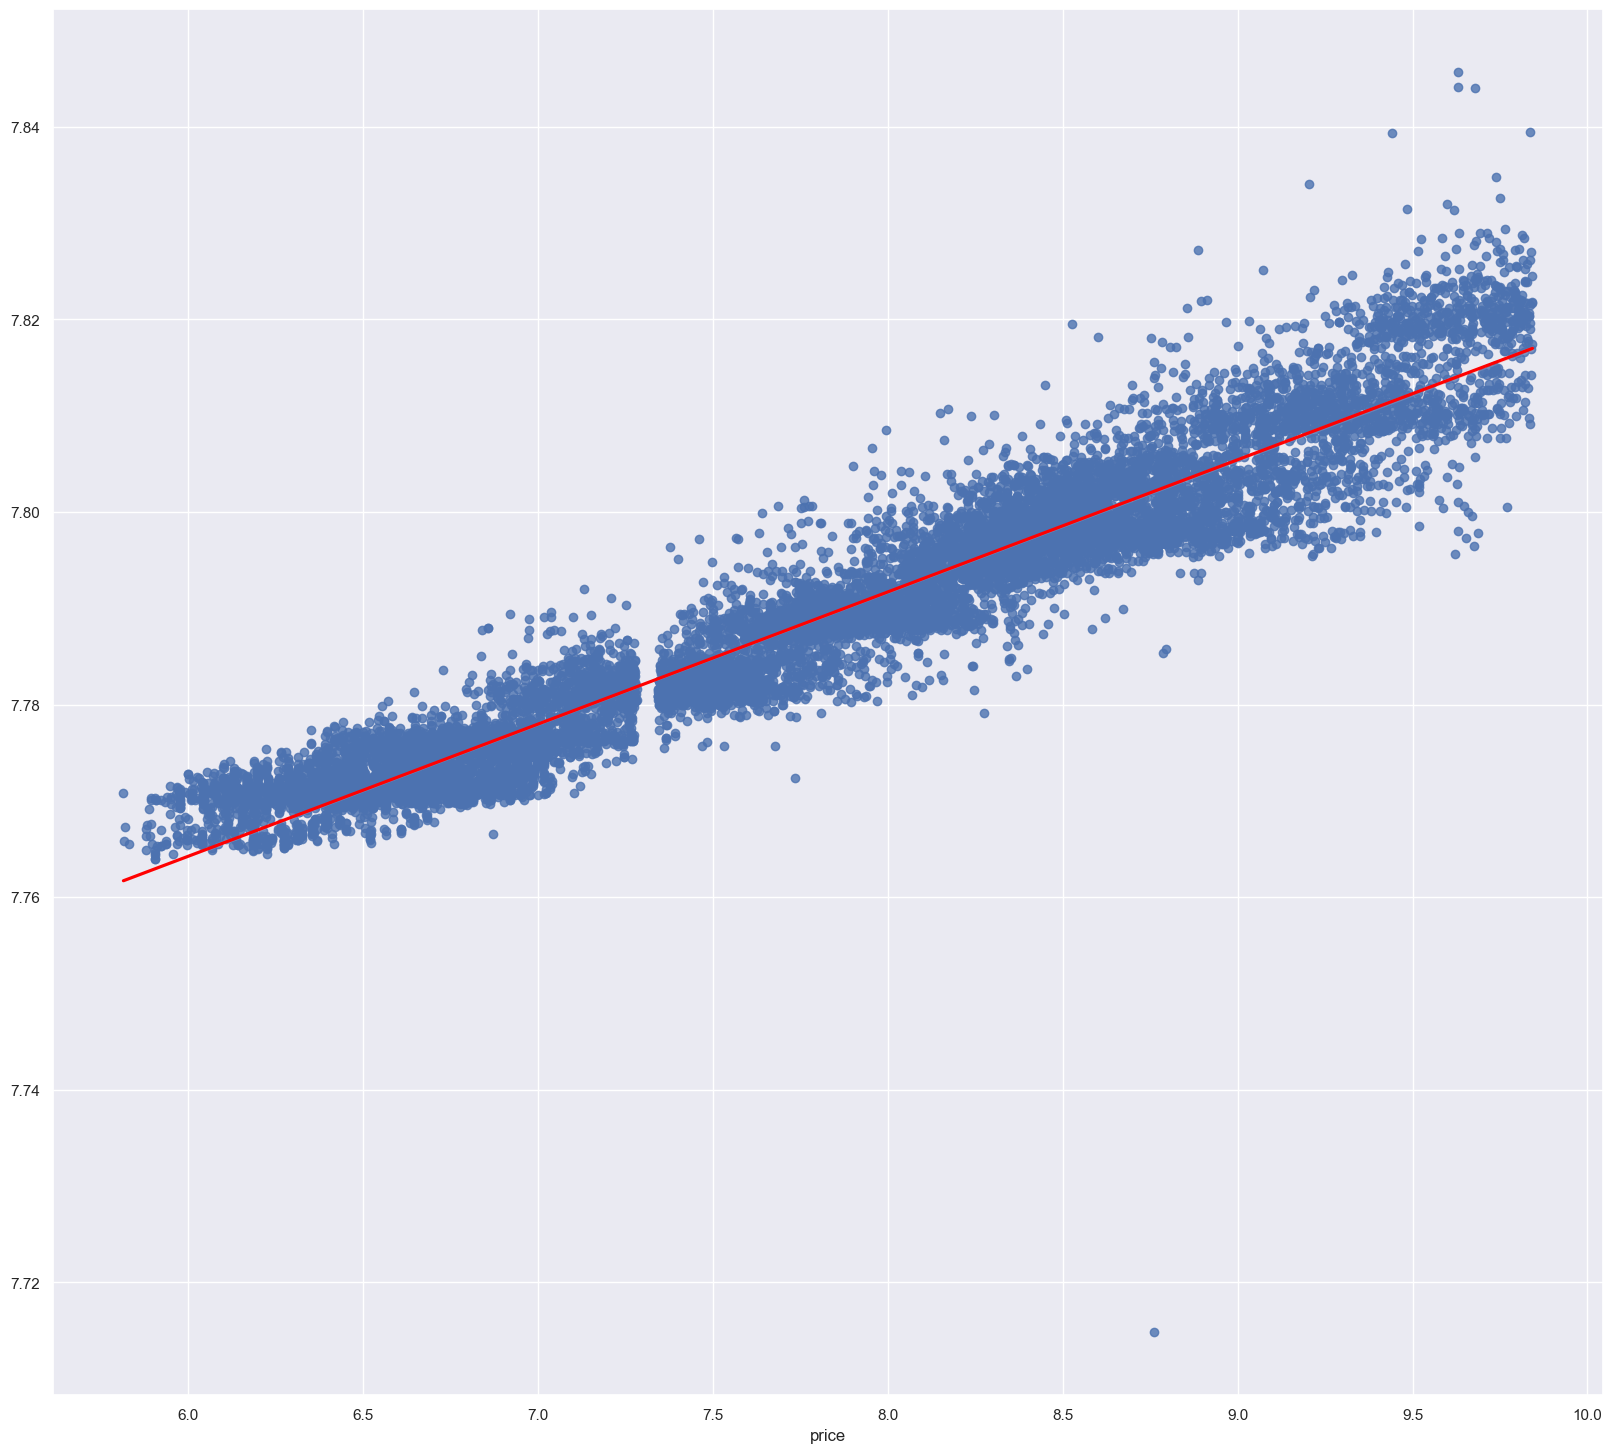

In [122]:
sns.regplot(y_test,yhat_test, line_kws={'color': 'red'})

- **Q-q plot for train data**

<Figure size 1000x400 with 0 Axes>

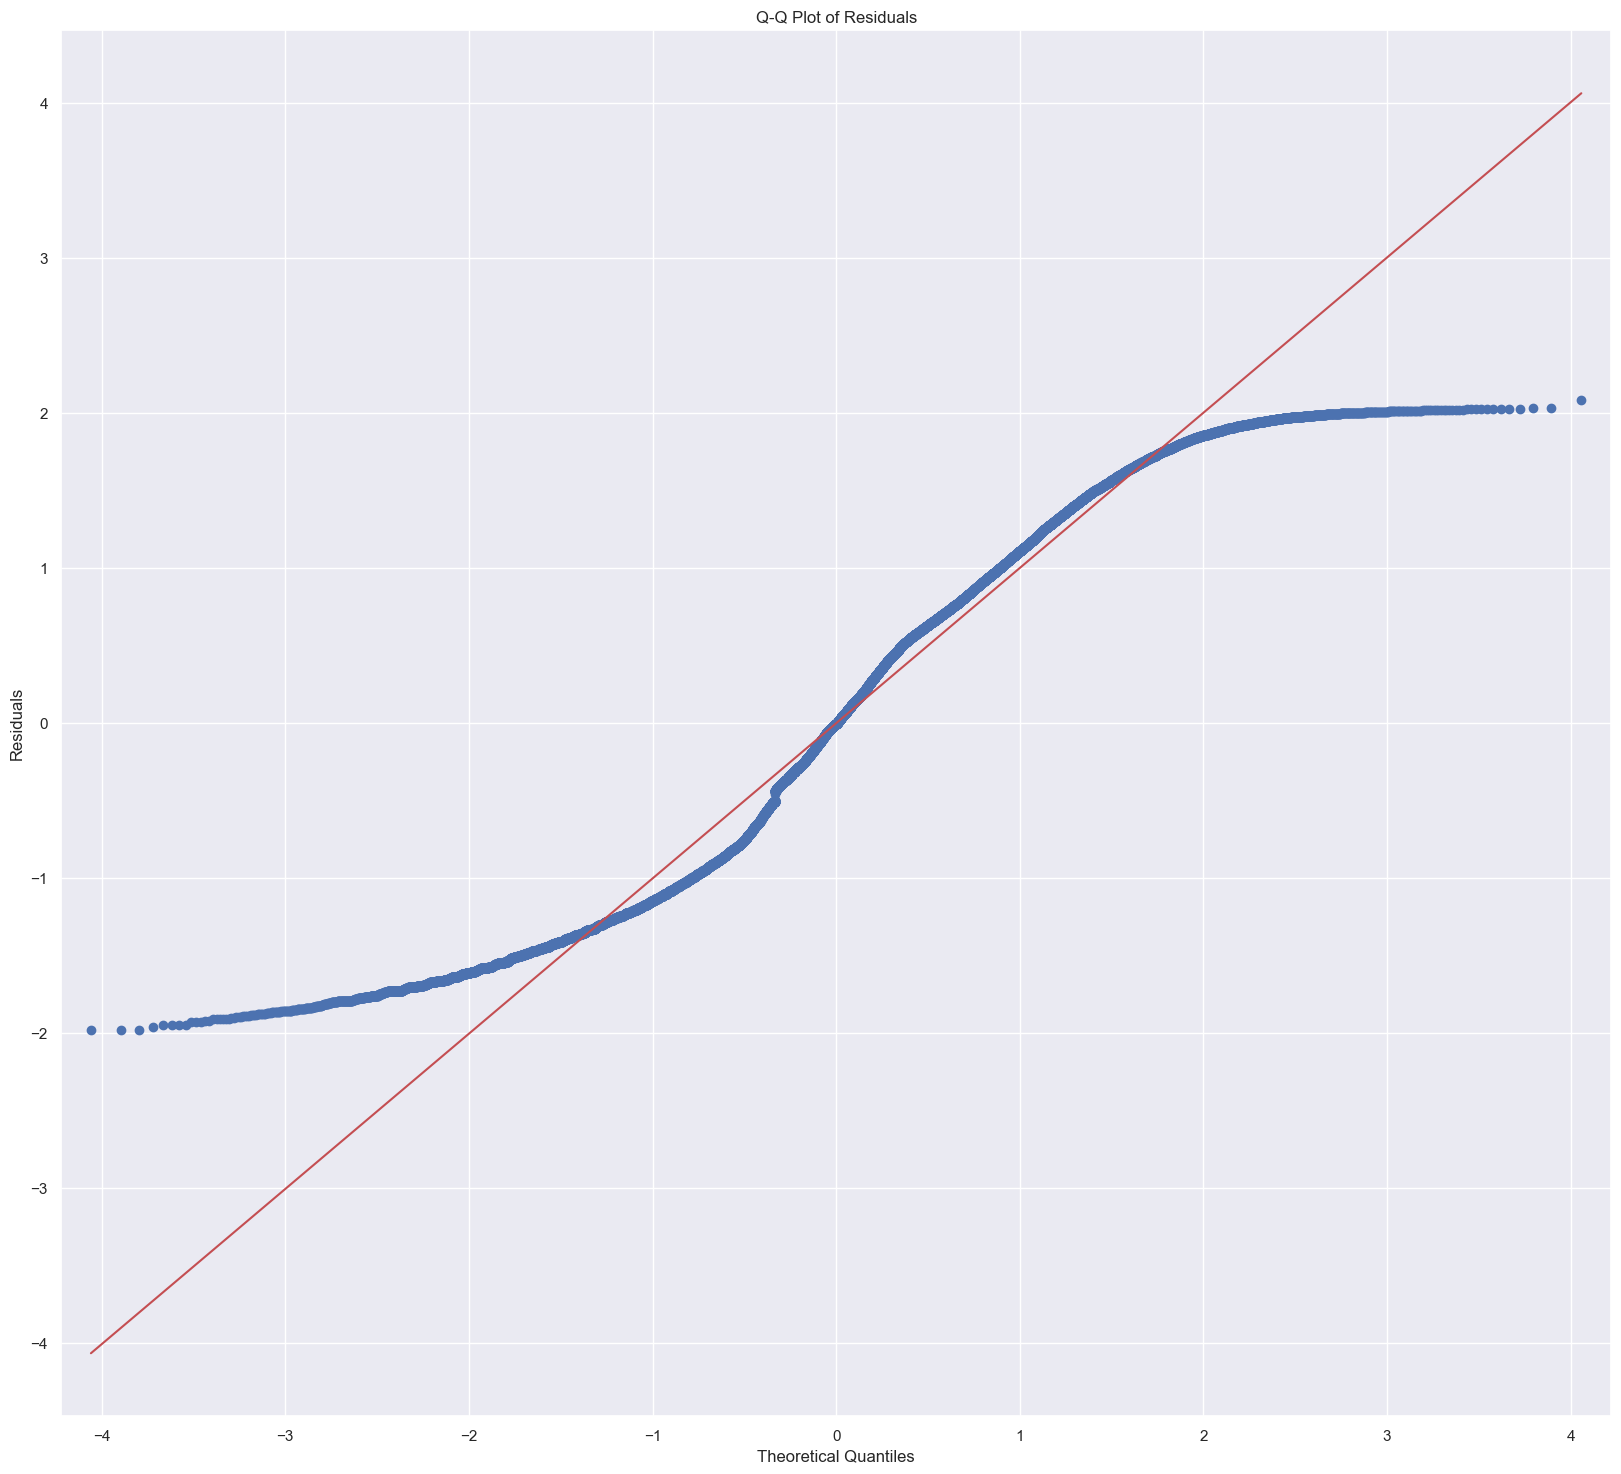

In [109]:
from statsmodels.graphics.gofplots import qqplot
plt.figure(figsize=(10,4))
# Generate the Q-Q plot of residuals
qqplot(y_train-yhat_train, line='s')

# Show the plot
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Residuals")
plt.title("Q-Q Plot of Residuals")
plt.show()

- **Q-Q plot for test data**

<Figure size 1000x400 with 0 Axes>

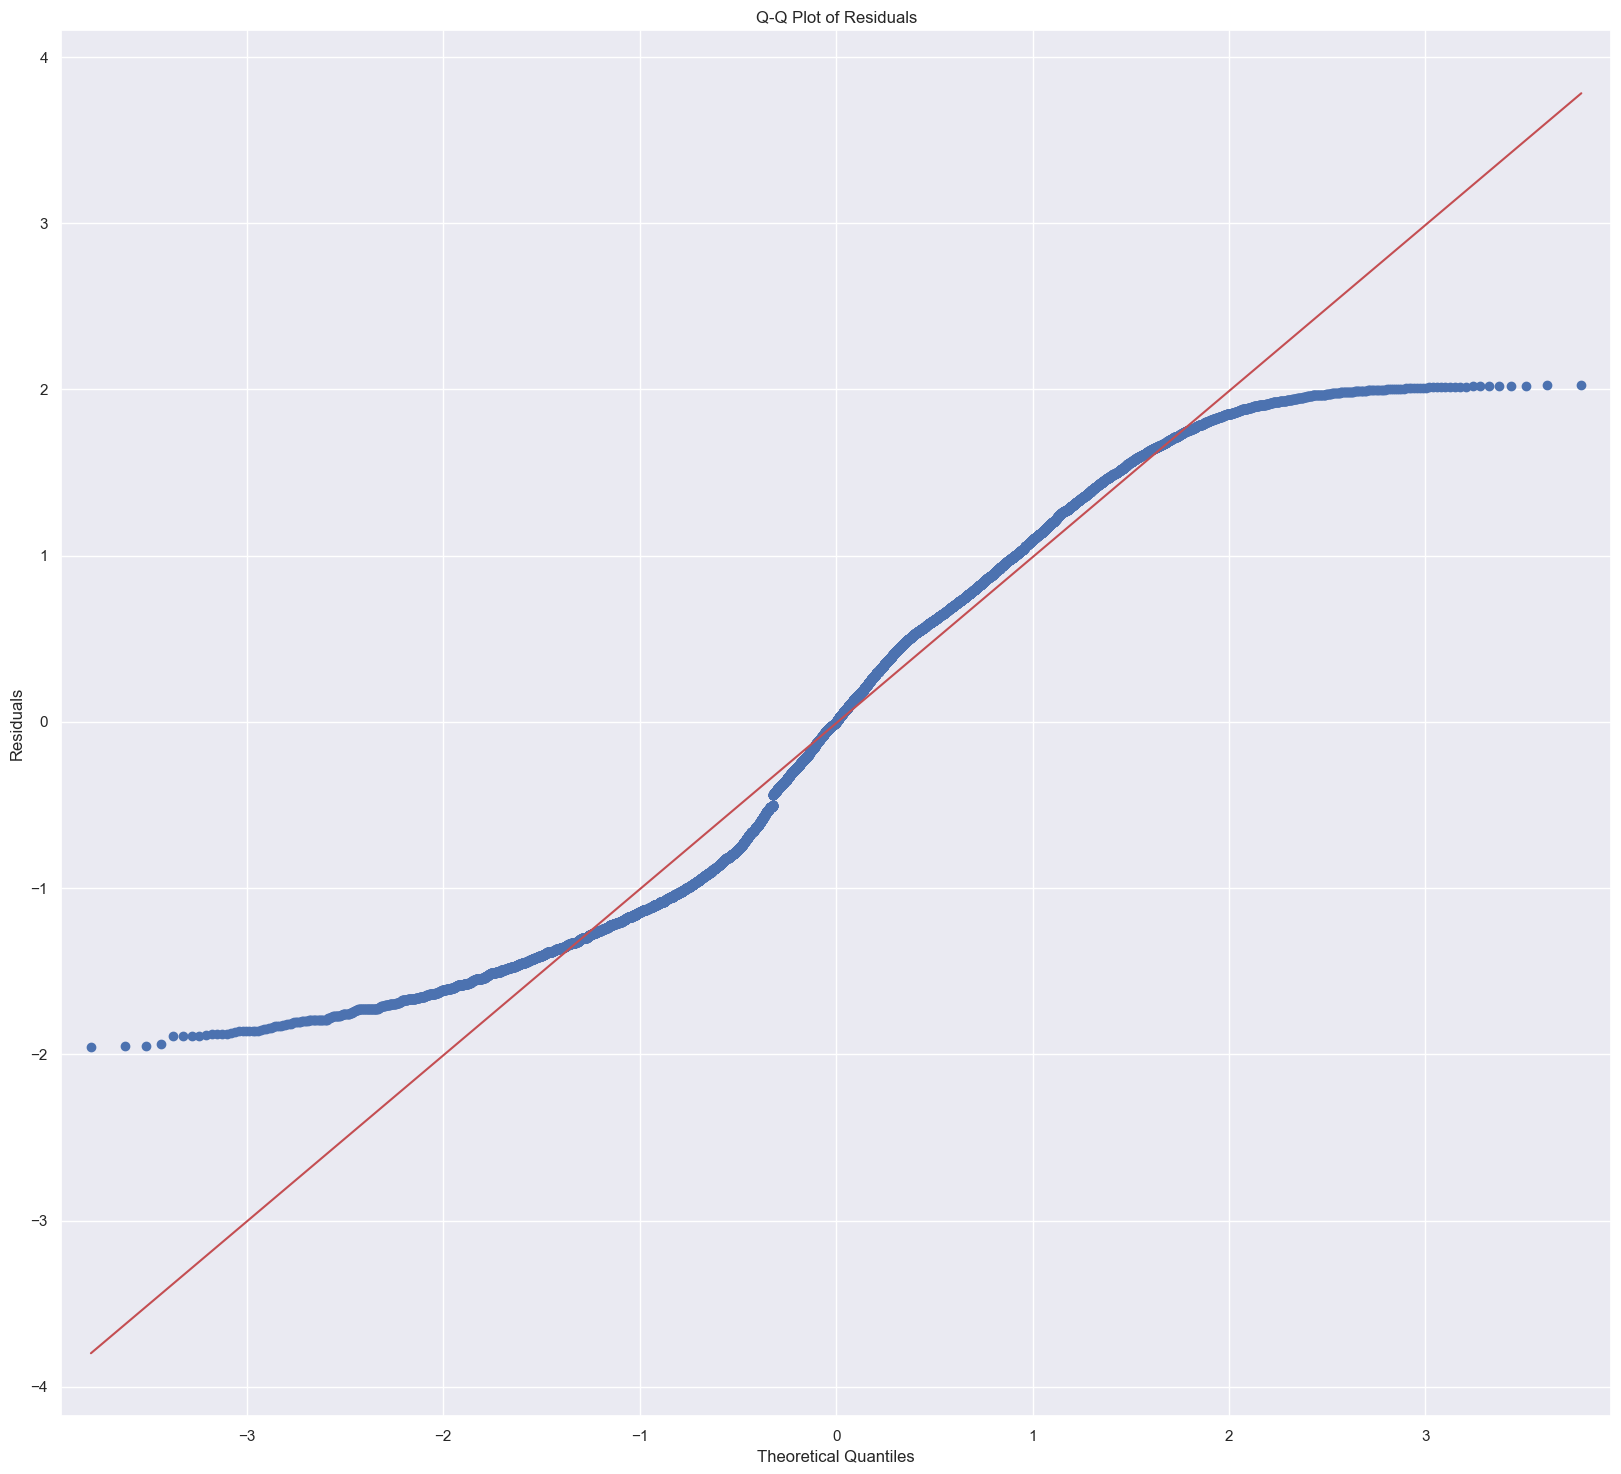

In [123]:
from statsmodels.graphics.gofplots import qqplot
plt.figure(figsize=(10,4))
# Generate the Q-Q plot of residuals
qqplot(y_test-yhat_test, line='s')

# Show the plot
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Residuals")
plt.title("Q-Q Plot of Residuals")
plt.show()

# Ridge Regression

In [111]:

print('Ridge Regression')
ri = Ridge()
model_ri = ri.fit(X_train,y_train)
yhat_train = model_ri.predict(X_train)
#ri_r_square_train = model_ri.score(X_train,yhat_train)


yhat_test = model_ri.predict(X_test)
#Ls_r_square_test = model_ri.score(X_test,yhat_test)



R_sq_train = model_ri.score(X_train,y_train)
R_sq_test = model_ri.score(X_test,y_test)
train_MSE = mean_squared_error(y_train,yhat_train)
test_MSE = mean_squared_error(y_test, yhat_test)
train_MAPE = mean_absolute_percentage_error(y_train,yhat_train)
test_MAPE = mean_absolute_percentage_error(y_test,yhat_test)

train = mean_absolute_percentage_error(y_train,yhat_train)
test = mean_absolute_percentage_error(y_test,yhat_test)
mape_percent_ls = np.mean(np.abs((train-test)/train))*100



print(f" R square for train model is {R_sq_train}")
print(f" Mse of train data is {train_MSE}")
print(f"Mse of test data is {test_MSE}")
print(f"MAPE of train data is {train_MAPE}")
print(f"MAPE of test data is {test_MAPE}")

Ridge Regression
 R square for train model is 0.9683660866773981
 Mse of train data is 0.03260727341713188
Mse of test data is 0.027117404008784117
MAPE of train data is 0.015031715384486048
MAPE of test data is 0.015071555833788797


- **Apply Grid SearchCv**

In [113]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'alpha': [0.1, 1.0, 10.0],
    'normalize': [True, False],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

# Create an instance of the Ridge regression model
ridge = Ridge()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to your data
grid_search.fit(X_train, y_train)

# Access the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Access the best estimator (fitted model)
best_model = grid_search.best_estimator_
best_params,best_score

({'alpha': 0.1, 'normalize': False, 'solver': 'sparse_cg'}, 0.9680493442810475)

In [114]:
best_model

Ridge(alpha=0.1, normalize=False, solver='sparse_cg')

- **fit the best model**

In [115]:

print('Ridge Regression')
ri = Ridge(alpha=0.1, normalize=False, solver='sparse_cg')
model_ri = ri.fit(X_train,y_train)
yhat_train = model_ri.predict(X_train)
#ri_r_square_train = model_ri.score(X_train,yhat_train)


yhat_test = model_ri.predict(X_test)
#Ls_r_square_test = model_ri.score(X_test,yhat_test)



R_sq_train = model_ri.score(X_train,y_train)
R_sq_test = model_ri.score(X_test,y_test)
train_MSE = mean_squared_error(y_train,yhat_train)
test_MSE = mean_squared_error(y_test, yhat_test)
train_MAPE = mean_absolute_percentage_error(y_train,yhat_train)
test_MAPE = mean_absolute_percentage_error(y_test,yhat_test)

train = mean_absolute_percentage_error(y_train,yhat_train)
test = mean_absolute_percentage_error(y_test,yhat_test)
mape_percent_ls = np.mean(np.abs((train-test)/train))*100



print(f" R square for train model is {R_sq_train}")
print(f" Mse of train data is {train_MSE}")
print(f"Mse of test data is {test_MSE}")
print(f"MAPE of train data is {train_MAPE}")
print(f"MAPE of test data is {test_MAPE}")

Ridge Regression
 R square for train model is 0.9685222683252859
 Mse of train data is 0.03244628613606173
Mse of test data is 0.026371479348471987
MAPE of train data is 0.01463749289419439
MAPE of test data is 0.014684526180435947


- **PLot the best line**

<AxesSubplot:xlabel='price'>

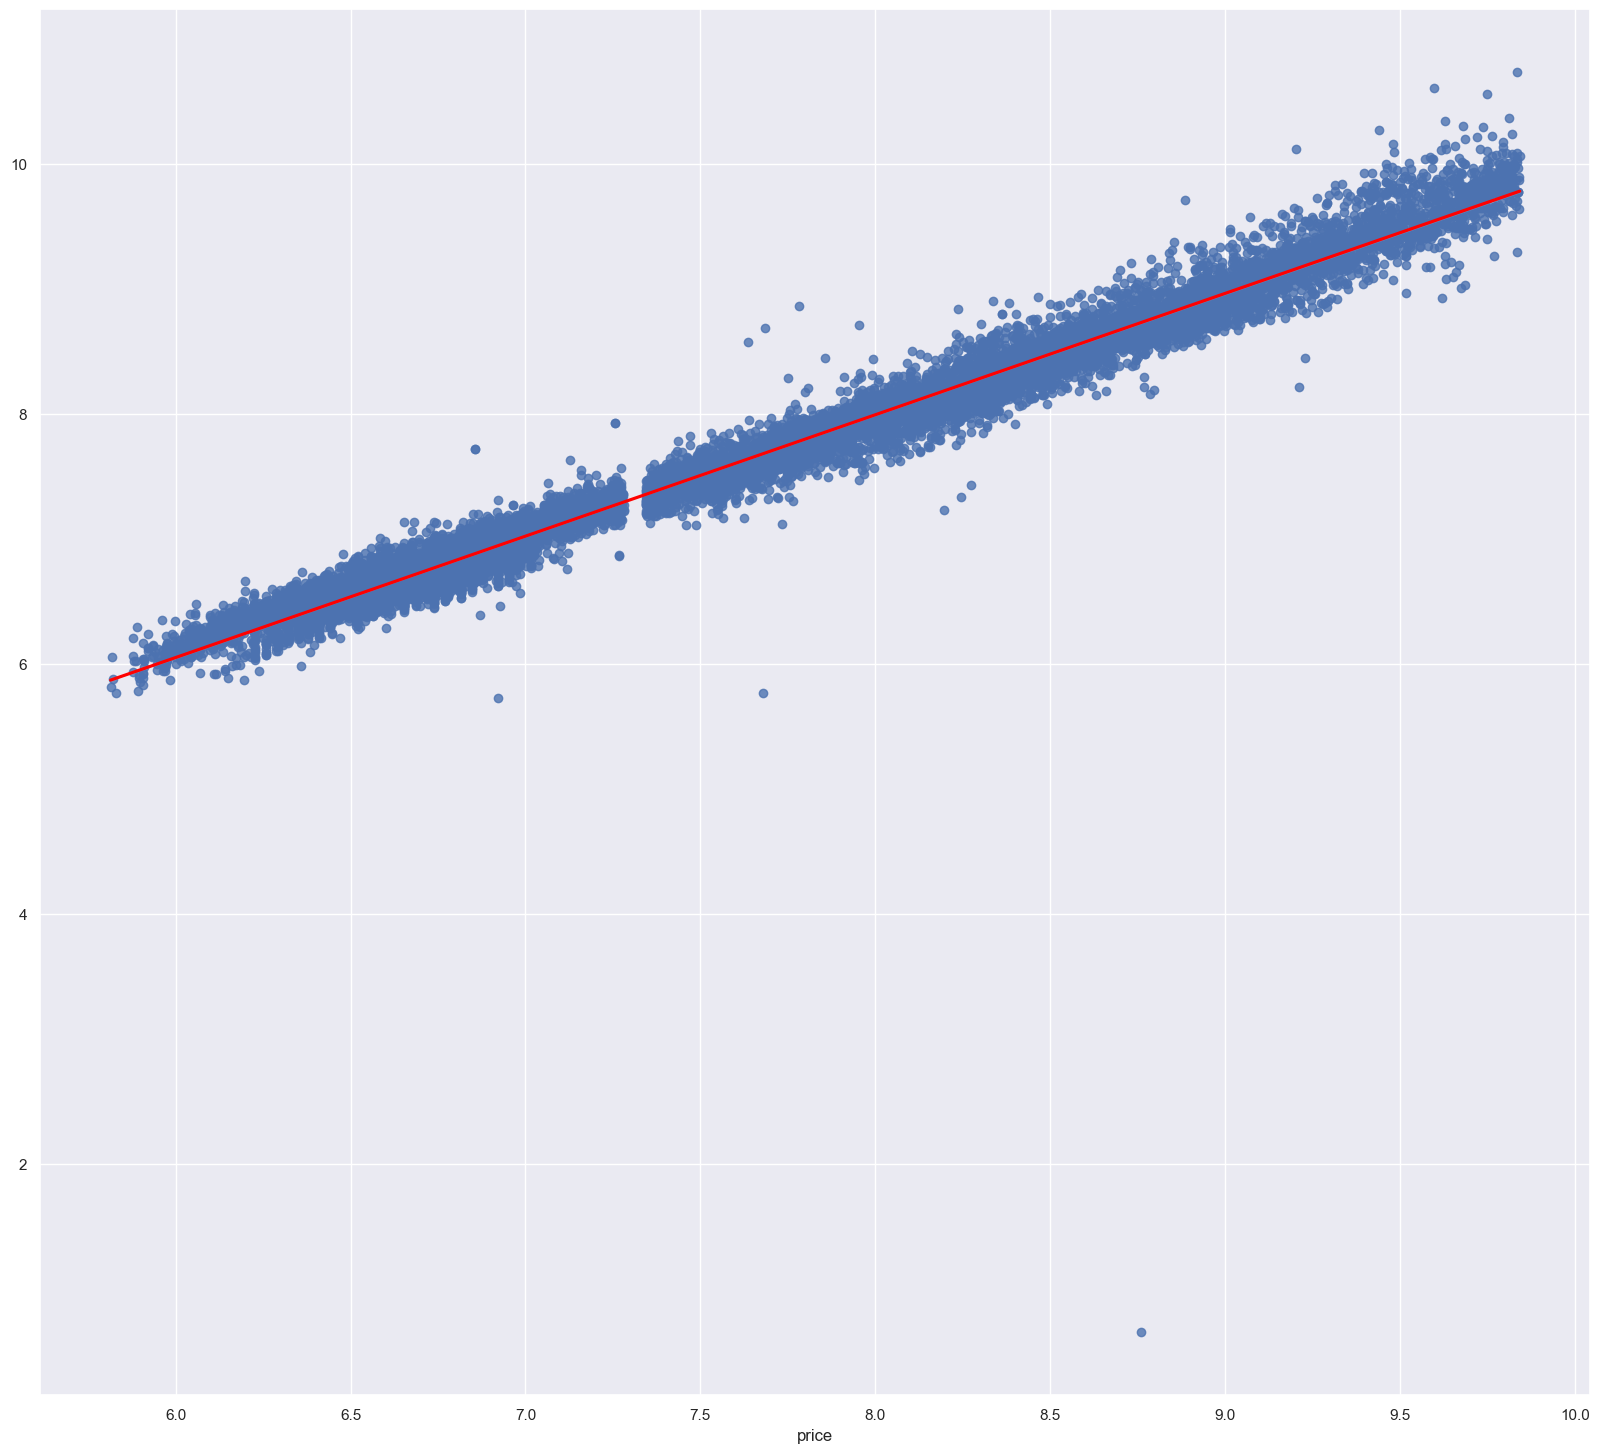

In [116]:
sns.regplot(y_test,yhat_test, line_kws={'color': 'red'})

- **Q-Q plot on the residuals of train**

<Figure size 1000x400 with 0 Axes>

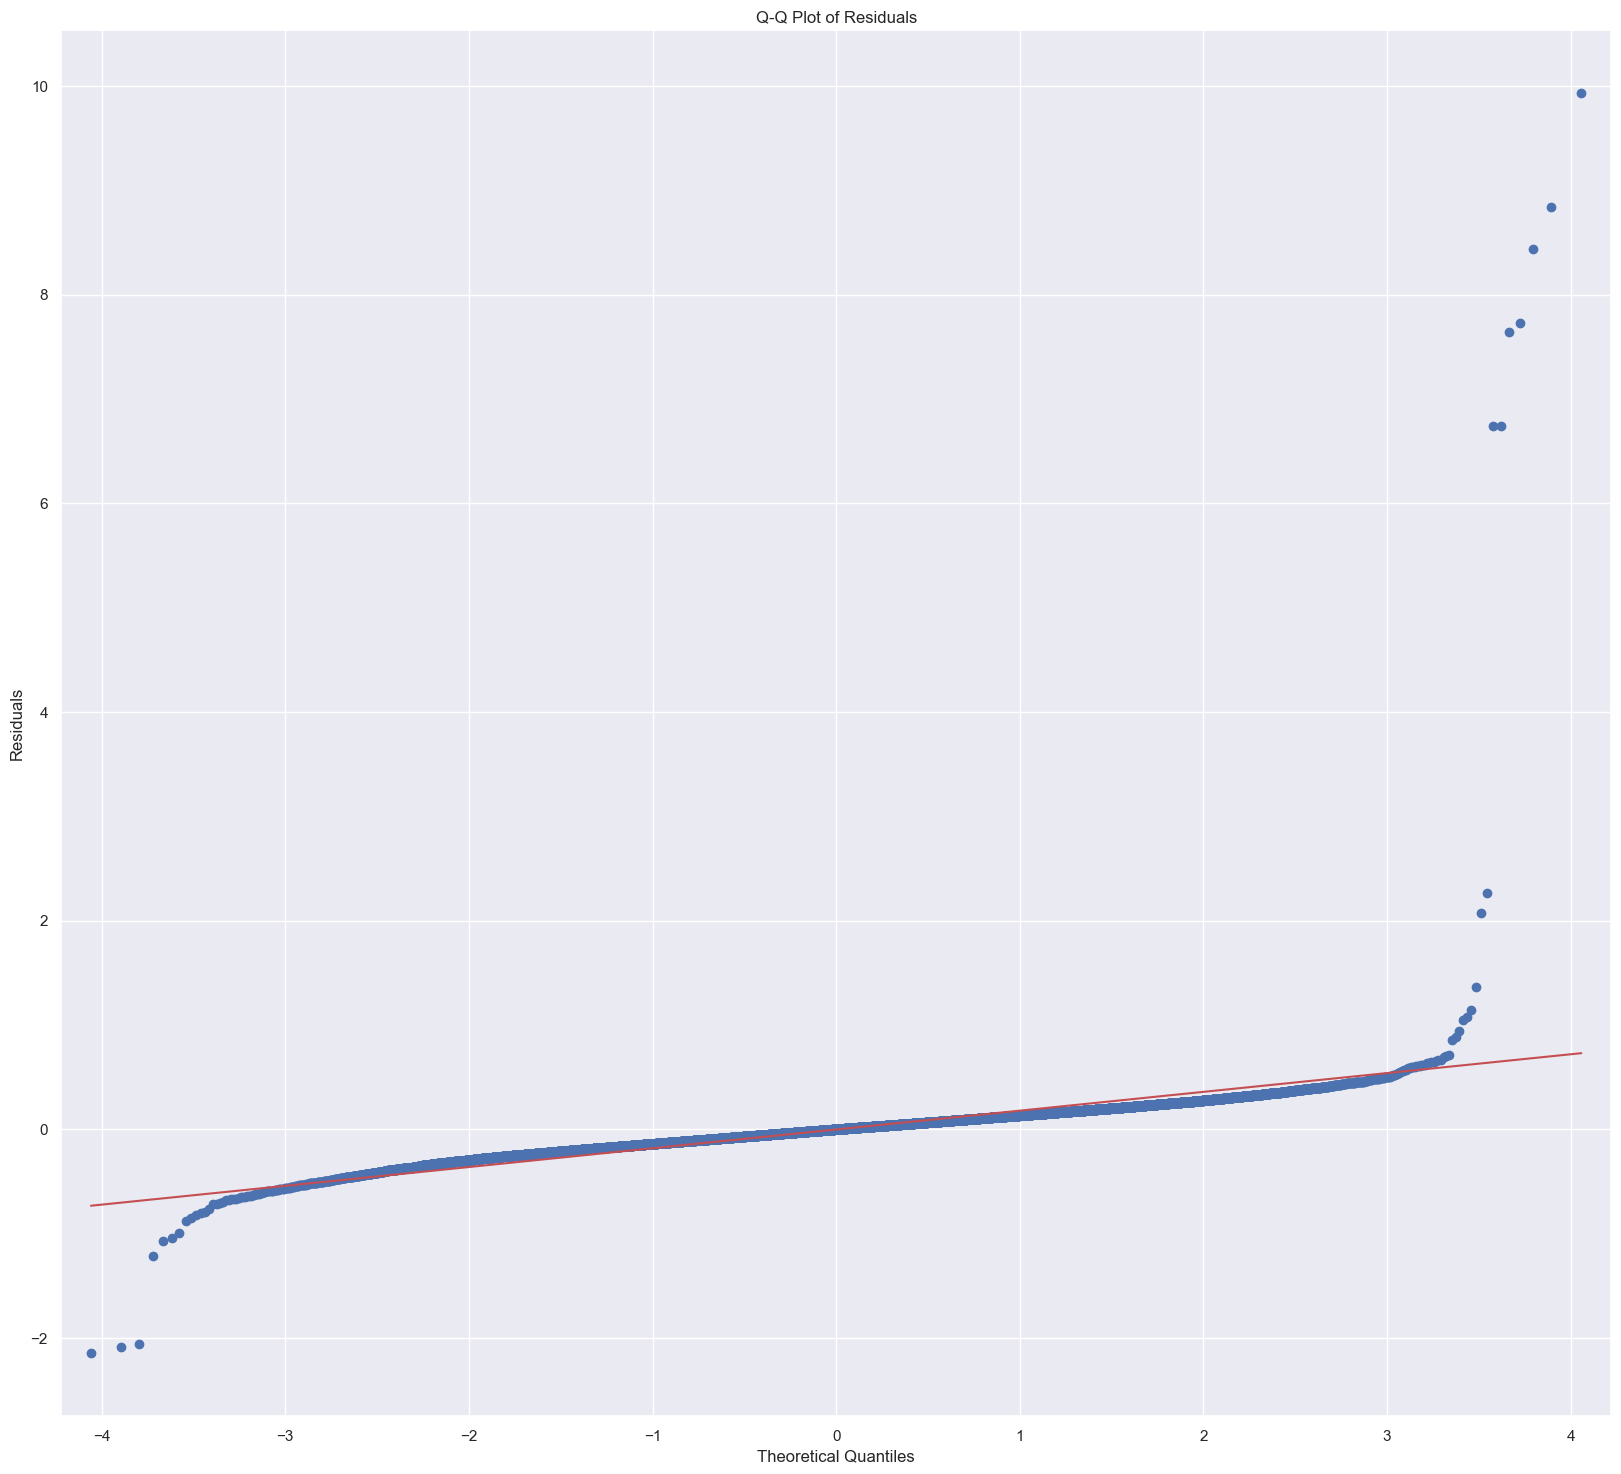

In [117]:
from statsmodels.graphics.gofplots import qqplot
plt.figure(figsize=(10,4))
# Generate the Q-Q plot of residuals
qqplot(y_train-yhat_train, line='s')

# Show the plot
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Residuals")
plt.title("Q-Q Plot of Residuals")
plt.show()

- **Q-Q plot on test data residuals**

<Figure size 1000x400 with 0 Axes>

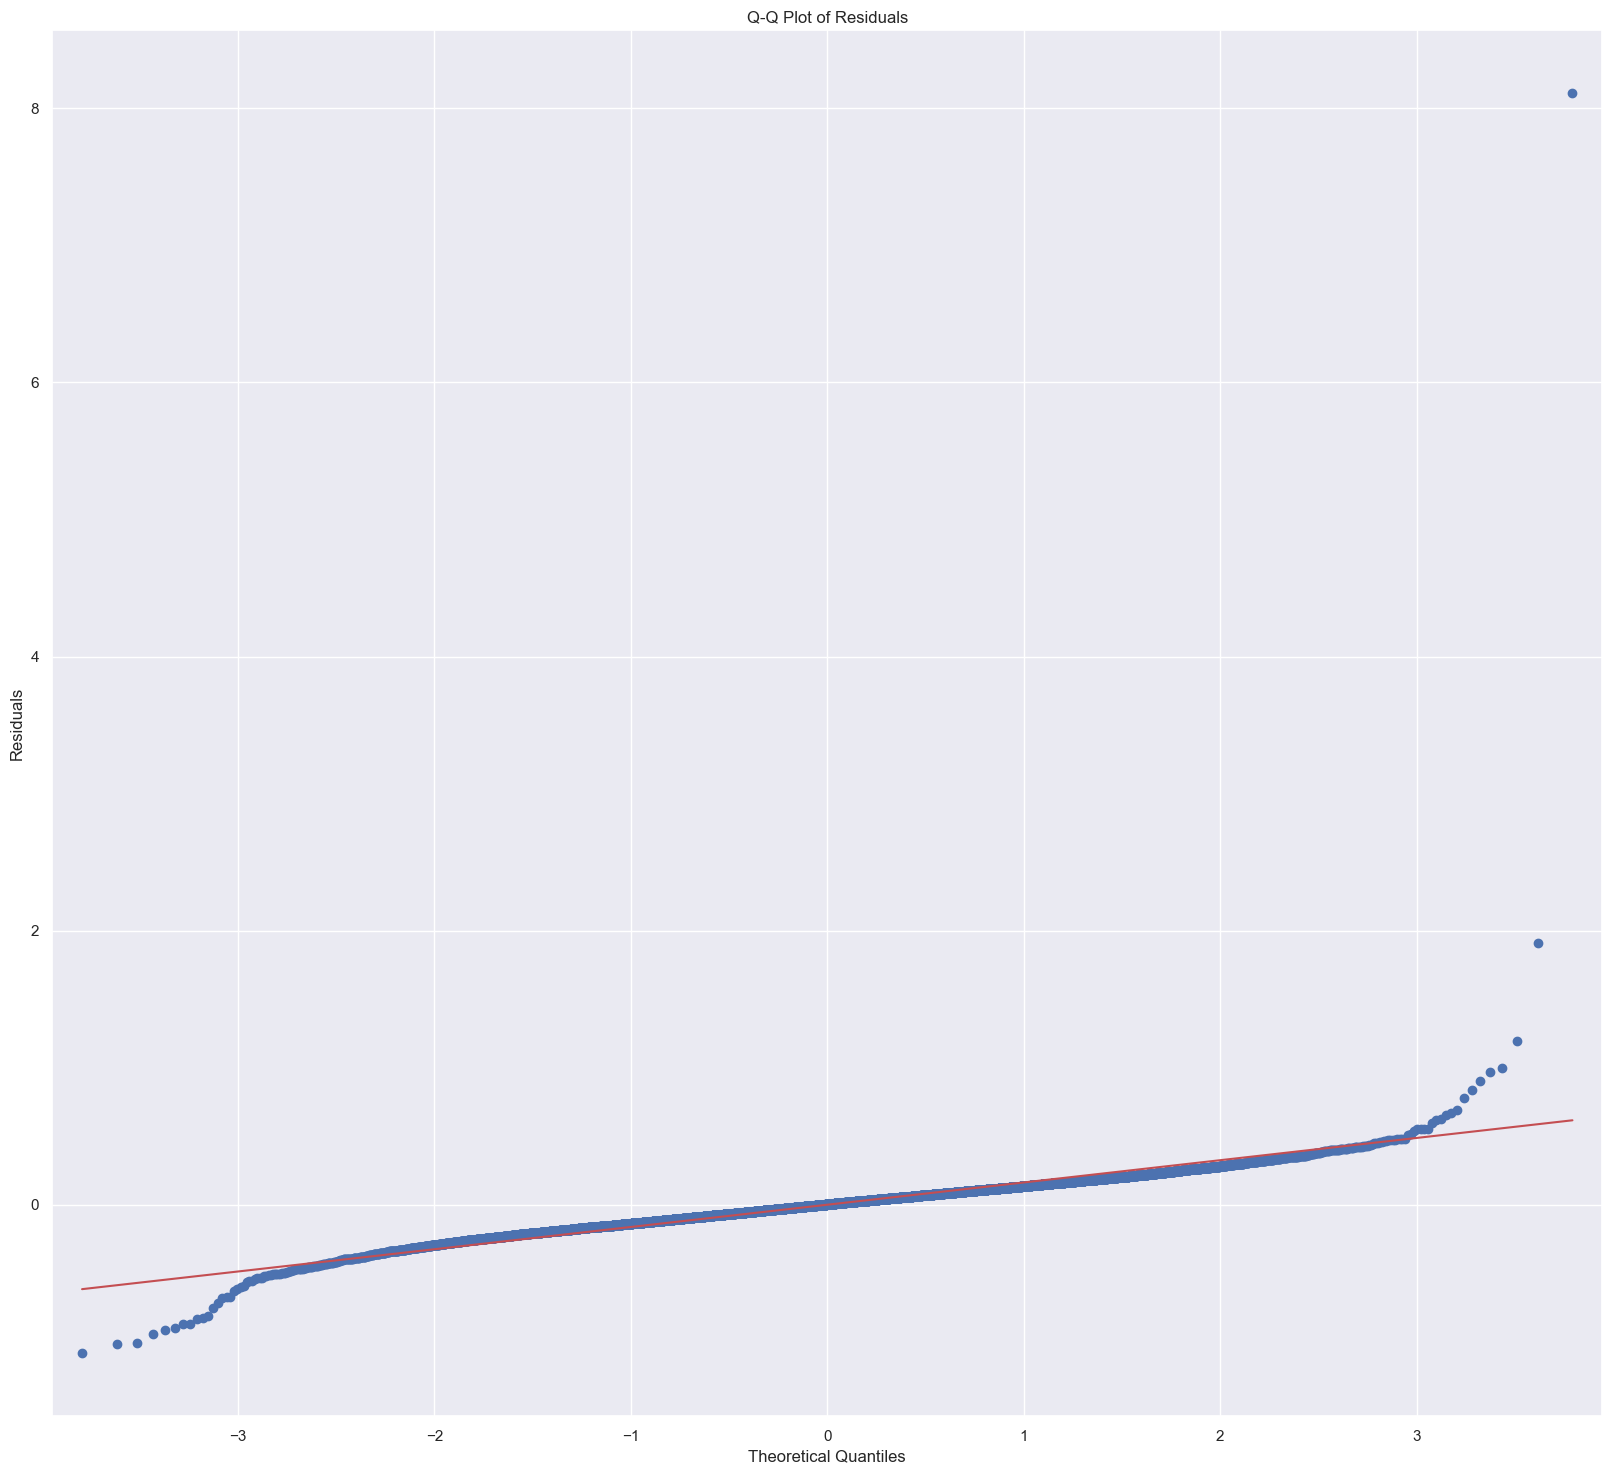

In [118]:
from statsmodels.graphics.gofplots import qqplot
plt.figure(figsize=(10,4))
# Generate the Q-Q plot of residuals
qqplot(y_test-yhat_test, line='s')

# Show the plot
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Residuals")
plt.title("Q-Q Plot of Residuals")
plt.show()

# Random Forest

In [152]:
from sklearn.preprocessing import OneHotEncoder
encode = OneHotEncoder(drop='first')
df_encoded = pd.DataFrame(encode.fit_transform(df_cat).toarray(), columns=encode.get_feature_names_out())
df_rf= pd.concat([df_encoded, df_num,df.price], axis=1)

In [154]:
print('Random Forest Regreesor')
X = df_rf.drop(columns = 'price')
y = df_rf.price
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size=0.25, random_state=42)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf = rf.fit(X_train,y_train)
yhat_train = model_rf.predict(X_train)
#rf_r_square_train = model_rf.score(X_train,yhat_train)


yhat_test = model_rf.predict(X_test)
#rf_r_square_test = model_rf.score(X_test,yhat_test)

R_sq_train = model_rf.score(X_train,y_train)
R_sq_test = model_rf.score(X_test,y_test)
train_MSE = mean_squared_error(y_train,yhat_train)
test_MSE = mean_squared_error(y_test, yhat_test)
train_MAPE = mean_absolute_percentage_error(y_train,yhat_train)
test_MAPE = mean_absolute_percentage_error(y_test,yhat_test)

train = mean_absolute_percentage_error(y_train,yhat_train)
test = mean_absolute_percentage_error(y_test,yhat_test)
mape_percent_ls = np.mean(np.abs((train-test)/train))*100



print(f" R square for train model is {R_sq_train}")
print(f" Mse of train data is {train_MSE}")
print(f"Mse of test data is {test_MSE}")
print(f"MAPE of train data is {train_MAPE}")
print(f"MAPE of test data is {test_MAPE}")

Random Forest Regreesor
 R square for train model is 0.9985300334060336
 Mse of train data is 0.0015151967495992914
Mse of test data is 0.010774696813776961
MAPE of train data is 0.003325221059171467
MAPE of test data is 0.008938693582554473


- **Apply grid searchCV**

In [155]:
rf = RandomForestRegressor()

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 5, 10],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required at each leaf node
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_rf = grid_search.best_estimator_
best_params = grid_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:")
print(best_params)


Best Hyperparameters:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


- **Run again with increasing the estimators**

In [156]:
rf = RandomForestRegressor()

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [300, 400, 500],  # Number of trees in the forest
    'max_depth': [None],  # Maximum depth of each tree
    'min_samples_split': [2],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1]  # Minimum number of samples required at each leaf node
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_rf = grid_search.best_estimator_
best_params = grid_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:")
print(best_params)


Best Hyperparameters:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}


In [159]:
best_params

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 400}

In [161]:
print('Best Model after grid cv, Random Forest Regreesor')
X = df_rf.drop(columns = 'price')
y = df_rf.price
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size=0.25, random_state=42)

rf = RandomForestRegressor(max_depth= None,
 min_samples_leaf= 1,
 min_samples_split= 2,
 n_estimators= 400)
model_rf = rf.fit(X_train,y_train)
yhat_train = model_rf.predict(X_train)
#rf_r_square_train = model_rf.score(X_train,yhat_train)


yhat_test = model_rf.predict(X_test)
#rf_r_square_test = model_rf.score(X_test,yhat_test)

R_sq_train = model_rf.score(X_train,y_train)
R_sq_test = model_rf.score(X_test,y_test)
train_MSE = mean_squared_error(y_train,yhat_train)
test_MSE = mean_squared_error(y_test, yhat_test)
train_MAPE = mean_absolute_percentage_error(y_train,yhat_train)
test_MAPE = mean_absolute_percentage_error(y_test,yhat_test)

train = mean_absolute_percentage_error(y_train,yhat_train)
test = mean_absolute_percentage_error(y_test,yhat_test)
mape_percent_ls = np.mean(np.abs((train-test)/train))*100



print(f" R square for train model is {R_sq_train}")
print(f" Mse of train data is {train_MSE}")
print(f"Mse of test data is {test_MSE}")
print(f"MAPE of train data is {train_MAPE}")
print(f"MAPE of test data is {test_MAPE}")

Best Model after grid cv, Random Forest Regreesor
 R square for train model is 0.9986040792023324
 Mse of train data is 0.0014388726002383737
Mse of test data is 0.010600013394620295
MAPE of train data is 0.0032736754027651105
MAPE of test data is 0.00887571424153512


- **Plot the feature importance**

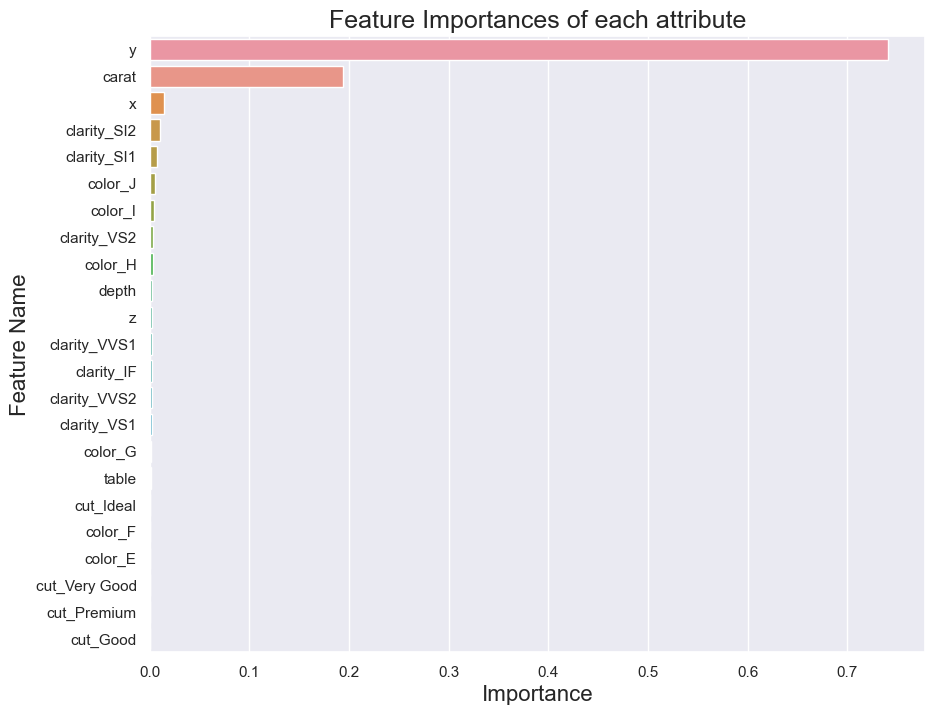

In [164]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": model_rf.feature_importances_
})
fi = imp_df.sort_values(by='Importance',ascending = False)
plt.figure(figsize=(10,8))
sns.barplot(data = fi,x = 'Importance',y='Feature Name')
plt.title("Feature Importances of each attribute",fontsize = 18)
plt.xlabel('Importance',fontsize=16)
plt.ylabel('Feature Name',fontsize =16)
plt.show()

In [173]:
df.head()

Unnamed: 0  carat      cut color clarity  depth  table     price     x  \
0           1   0.23    Ideal     E     SI2   61.5   55.0  5.786897  3.95   
1           2   0.21  Premium     E     SI1   59.8   61.0  5.786897  3.89   
2           3   0.23     Good     E     VS1   56.9   65.0  5.789960  4.05   
3           4   0.29  Premium     I     VS2   62.4   58.0  5.811141  4.20   
4           5   0.31     Good     J     SI2   63.3   58.0  5.814131  4.34   

      y     z  
0  3.98  2.43  
1  3.84  2.31  
2  4.07  2.31  
3  4.23  2.63  
4  4.35  2.75

# Create a pipeline 

In [6]:
df = df2
df = df.drop(columns='Unnamed: 0')

In [16]:
df.head(5)

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

In [7]:
X = df.drop(columns = 'price')
y = df.price
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size=0.25, random_state=42)


In [8]:
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer

In [9]:
## one hot encoding transformer
trf1 = ColumnTransformer([
    ('df_encoded',OneHotEncoder(),[1,2,3])
],remainder ='passthrough')

In [10]:
### scaling
trf2 = ColumnTransformer([
    ('scaled',MinMaxScaler(),[0,4,5,7,8,9])
],remainder ='passthrough')

In [11]:
# trf3 = ColumnTransformer([
#     ('price',FunctionTransformer(np.log),[6])
# ])

In [12]:
## train model
trf4 = RandomForestRegressor(max_depth= None,
 min_samples_leaf= 1,
 min_samples_split= 2,
 n_estimators= 400)

 - **Create Pipeline**

In [13]:
from sklearn import set_config
set_config(display ='diagram')

In [14]:
pipe = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
#     ('trf3',trf3),
    ('trf4',trf4)
])

In [15]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('df_encoded', OneHotEncoder(),
                                                  [1, 2, 3])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaled', MinMaxScaler(),
                                                  [0, 4, 5, 7, 8, 9])])),
                ('trf4', RandomForestRegressor(n_estimators=400))])

In [187]:
## steps followed in pipeline
pipe.named_steps

{'trf1': ColumnTransformer(remainder='passthrough',
                   transformers=[('df_encoded', OneHotEncoder(), [1, 2, 3])]),
 'trf2': ColumnTransformer(transformers=[('scaled', MinMaxScaler(), [0, 4, 5, 7, 8, 9])]),
 'trf3': RandomForestRegressor(n_estimators=400)}

In [252]:
###Mapse on test
np.mean(np.abs((y_test - pipe.predict(X_test))/y_test))

0.06574708543761477

In [266]:
import pickle
pickle.dump(pipe,open('Diamond_pred.pkl','wb'))

## create a pickle file for your model

In [165]:
import pickle

# Save the trained model as a pickle file
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(model_rf, file)


In [170]:
pickle.dump(encode,open('encode.pkl','wb'))


In [169]:
pickle.dump(encode,open('encode.pkl','wb'))
pickle.dump(min_max,open('scaled.pkl','wb'))